# **RA2: work 1 230808**

## **work 1: quarterly gdp**

Dong Gyun Ko <br/>
last updated: august 8, 2023 <br/>

In [1]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
import datetime as dt
import requests # python 3.6
import os
import warnings

# tqdm
from tqdm import tqdm

# seaborn
import seaborn as sns

# statsmodel
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

# data api
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas_datareader import wb
from pandas_datareader.data import DataReader

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# set the option of max rows

pd.set_option('display.max_rows', 100)

In [3]:
# set the working directory

os.chdir('/content/gdrive/MyDrive/Colab Notebooks/RA2_data')

# **1. df_imf_q_gdp** <br/>

## **1.1. python code** <br/>

In [4]:
# import the raw data

df_imf_q = pd.read_csv('df_imf_q_gdp.csv').sort_values(by=['country', 'quarter']).reset_index(drop=True)
df_ns_q_gdp_chn = pd.read_excel('df_ns_q_gdp_chn.xlsx').sort_values(by=['country', 'quarter']).reset_index(drop=True)

In [5]:
# append the raw data

df_imf_q = df_imf_q.append(df_ns_q_gdp_chn)
df_imf_q = df_imf_q.sort_values(by=['country', 'quarter']).reset_index(drop=True)

<ipython-input-5-0735e1cde633>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imf_q = df_imf_q.append(df_ns_q_gdp_chn)


In [6]:
# filter

cond1 = (df_imf_q['country'] == 'Advanced Economies')
cond2 = (df_imf_q['country'] == 'Anguilla')
cond3 = (df_imf_q['country'] == 'Cura?ao, Kingdom of the Netherlands')
cond4 = (df_imf_q['country'] == 'Czechoslovakia')
cond5 = (df_imf_q['country'] == 'Emerging and Developing Asia')
cond6 = (df_imf_q['country'] == 'Emerging and Developing Countries')
cond7 = (df_imf_q['country'] == 'Euro Area')
cond8 = (df_imf_q['country'] == 'Netherlands Antilles')
cond9 = (df_imf_q['country'] == 'Sub-Saharan Africa')
cond10 = (df_imf_q['country'] == 'Taiwan Province of China')
cond11 = (df_imf_q['country'] == 'West African Economic and Monetary Union (WAEMU)')
cond12 = (df_imf_q['country'] == 'West Bank and Gaza')
cond13 = (df_imf_q['country'] == 'Western Hemisphere')
cond14 = (df_imf_q['country'] == 'World')
cond15 = (df_imf_q['country'] == 'Yugoslavia')
cond16 = (df_imf_q['country'] == 'Montserrat')
cond17 = (df_imf_q['country'] == 'Eritrea, The State of')
cond18 = (df_imf_q['country'] == 'Cura?ao and Sint Maarten')
cond19 = (df_imf_q['country'] == 'Eastern Caribbean Currency Union (ECCU)')
cond20 = (df_imf_q['country'] == 'Central African Economic and Monetary Community')
cond21 = (df_imf_q['country'] == 'Guernsey')
cond22 = (df_imf_q['country'] == 'Jersey')
cond23 = (df_imf_q['country'] == 'Reunion')
cond24 = (df_imf_q['country'] == "Yemen, People's Dem. Rep. of")
cond25 = (df_imf_q['country'] == 'Yemen Arab Rep.')

df_imf_q = df_imf_q.loc[~cond1 & ~cond2 & ~cond3 & ~cond4 & ~cond5 & ~cond6 & ~cond7 & ~cond8 & ~cond9 & ~cond10 &
                        ~cond11 & ~cond12 & ~cond13 & ~cond14 & ~cond15 & ~cond16 & ~cond17 & ~cond18 & ~cond19 & ~cond20 &
                        ~cond21 & ~cond22 & ~cond23 & ~cond24 & ~cond25]

In [7]:
# replace the country

df_imf_q = df_imf_q.replace({'country':'Afghanistan, Islamic Rep. of'}, 'Afghanistan')
df_imf_q = df_imf_q.replace({'country':'Armenia, Rep. of'}, 'Armenia')
df_imf_q = df_imf_q.replace({'country':'Aruba, Kingdom of the Netherlands'}, 'Aruba')
df_imf_q = df_imf_q.replace({'country':'Azerbaijan, Rep. of'}, 'Azerbaijan')
df_imf_q = df_imf_q.replace({'country':'Bahrain, Kingdom of'}, 'Bahrain')
df_imf_q = df_imf_q.replace({'country':'Belarus, Rep. of'}, 'Belarus')
df_imf_q = df_imf_q.replace({'country':"C?te d'Ivoire"}, "Cote d'Ivoire")
df_imf_q = df_imf_q.replace({'country':'Central African Rep.'}, 'Central African Republic')
df_imf_q = df_imf_q.replace({'country':'China, P.R.: Hong Kong'}, 'Hong Kong SAR, China')
df_imf_q = df_imf_q.replace({'country':'China, P.R.: Mainland'}, 'China')
df_imf_q = df_imf_q.replace({'country':'Comoros, Union of the'}, 'Comoros')
df_imf_q = df_imf_q.replace({'country':'Congo, Dem. Rep. of the'}, 'Congo, Dem. Rep.')
df_imf_q = df_imf_q.replace({'country':'Congo, Rep. of'}, 'Congo, Rep.')
df_imf_q = df_imf_q.replace({'country':'Croatia, Rep. of'}, 'Croatia')
df_imf_q = df_imf_q.replace({'country':'Czech Rep.'}, 'Czech Republic')
df_imf_q = df_imf_q.replace({'country':'Dominican Rep.'}, 'Dominican Republic')
df_imf_q = df_imf_q.replace({'country':'Egypt, Arab Rep. of'}, 'Egypt, Arab Rep.')
df_imf_q = df_imf_q.replace({'country':'Equatorial Guinea, Rep. of'}, 'Equatorial Guinea')
df_imf_q = df_imf_q.replace({'country':'Estonia, Rep. of'}, 'Estonia')
df_imf_q = df_imf_q.replace({'country':'Eswatini, Kingdom of'}, 'Eswatini')
df_imf_q = df_imf_q.replace({'country':'Ethiopia, The Federal Dem. Rep. of'}, 'Ethiopia')
df_imf_q = df_imf_q.replace({'country':'Fiji, Rep. of'}, 'Fiji')
df_imf_q = df_imf_q.replace({'country':'Iran, Islamic Rep. of'}, 'Iran, Islamic Rep.')
df_imf_q = df_imf_q.replace({'country':'Kazakhstan, Rep. of'}, 'Kazakhstan')
df_imf_q = df_imf_q.replace({'country':'Korea, Rep. of'}, 'Korea, Rep.')
df_imf_q = df_imf_q.replace({'country':'Kosovo, Rep. of'}, 'Kosovo')
df_imf_q = df_imf_q.replace({'country':'Kyrgyz Rep.'}, 'Kyrgyz Republic')
df_imf_q = df_imf_q.replace({'country':"Lao People's Dem. Rep."}, 'Lao PDR')
df_imf_q = df_imf_q.replace({'country':'Lesotho, Kingdom of'}, 'Lesotho')
df_imf_q = df_imf_q.replace({'country':'China, P.R.: Macao'}, 'Macao SAR, China')
df_imf_q = df_imf_q.replace({'country':'Madagascar, Rep. of'}, 'Madagascar')
df_imf_q = df_imf_q.replace({'country':'Mauritania, Islamic Rep. of'}, 'Mauritania')
df_imf_q = df_imf_q.replace({'country':'Micronesia, Federated States of'}, 'Micronesia, Fed. Sts.')
df_imf_q = df_imf_q.replace({'country':'Moldova, Rep. of'}, 'Moldova')
df_imf_q = df_imf_q.replace({'country':'Mozambique, Rep. of'}, 'Mozambique')
df_imf_q = df_imf_q.replace({'country':'Nauru, Rep. of'}, 'Nauru')
df_imf_q = df_imf_q.replace({'country':'Netherlands, The'}, 'Netherlands')
df_imf_q = df_imf_q.replace({'country':'North Macedonia, Republic of'}, 'North Macedonia')
df_imf_q = df_imf_q.replace({'country':'Palau, Rep. of'}, 'Palau')
df_imf_q = df_imf_q.replace({'country':'Poland, Rep. of'}, 'Poland')
df_imf_q = df_imf_q.replace({'country':'S?o Tom? and Pr?ncipe, Dem. Rep. of'}, 'Sao Tome and Principe')
df_imf_q = df_imf_q.replace({'country':'San Marino, Rep. of'}, 'San Marino')
df_imf_q = df_imf_q.replace({'country':'Serbia, Rep. of'}, 'Serbia')
df_imf_q = df_imf_q.replace({'country':'Sint Maarten, Kingdom of the Netherlands'}, 'Sint Maarten (Dutch part)')
df_imf_q = df_imf_q.replace({'country':'Slovak Rep.'}, 'Slovak Republic')
df_imf_q = df_imf_q.replace({'country':'Slovenia, Rep. of'}, 'Slovenia')
df_imf_q = df_imf_q.replace({'country':'South Sudan, Rep. of'}, 'South Sudan')
df_imf_q = df_imf_q.replace({'country':'Syrian Arab Rep.'}, 'Syrian Arab Republic')
df_imf_q = df_imf_q.replace({'country':'Tajikistan, Rep. of'}, 'Tajikistan')
df_imf_q = df_imf_q.replace({'country':'Tanzania, United Rep. of'}, 'Tanzania')
df_imf_q = df_imf_q.replace({'country':'Timor-Leste, Dem. Rep. of'}, 'Timor-Leste')
df_imf_q = df_imf_q.replace({'country':'T?rkiye, Rep of'}, 'Turkiye')
df_imf_q = df_imf_q.replace({'country':'Uzbekistan, Rep. of'}, 'Uzbekistan')
df_imf_q = df_imf_q.replace({'country':'Venezuela, Rep. Bolivariana de'}, 'Venezuela, RB')
df_imf_q = df_imf_q.replace({'country':'Yemen, Rep. of'}, 'Yemen, Rep.')
df_imf_q = df_imf_q.replace({'country':'Andorra, Principality of'}, 'Andorra')

In [8]:
# merge the wb isocode data

df_wb_isocode = pd.read_csv('df_wb_isocode_country.csv', encoding='utf-8').rename(columns={'alpha-3':'isocode'})
df_imf_q = df_imf_q[['country', 'quarter', 'gdp']]
df_imf_q = pd.merge(df_wb_isocode, df_imf_q, how='right', on=['country'])
df_imf_q = df_imf_q.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)
df_imf_q['quarter'] = pd.to_datetime(df_imf_q['quarter'])
df_imf_q['quarter'] = df_imf_q['quarter'].dt.to_period('Q')

In [9]:
# generate the quarterly temp data

df_q_temp = pd.read_csv('df_q_temp.csv').set_index(['country', 'alpha-3']).transpose()
df_q_temp = pd.DataFrame(df_q_temp.stack(level=['country', 'alpha-3'])).reset_index()
df_q_temp = df_q_temp.rename(columns={'level_0':'quarter', 'alpha-3':'isocode', 0:'value'})
df_q_temp = df_q_temp[['country', 'isocode', 'quarter', 'value']].sort_values(by=['isocode', 'quarter']).reset_index(drop=True)
df_q_temp['quarter'] = pd.to_datetime(df_q_temp['quarter'])
df_q_temp['quarter'] = df_q_temp['quarter'].dt.to_period('Q')

<ipython-input-9-94dfd79f4b45>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_q_temp['quarter'] = pd.to_datetime(df_q_temp['quarter'])


In [10]:
# merge the quarterly pooled data with the quarterly temp data

df_imf_q = pd.merge(df_imf_q, df_q_temp, how='outer', on=['country', 'isocode', 'quarter']).drop(columns=['value'])

In [11]:
# quarterly pooled dataset

df_imf_q = df_imf_q.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

df_imf_q

,country,isocode,quarter,gdp
0,Aruba,ABW,1913Q1,NaN
1,Aruba,ABW,1913Q2,NaN
2,Aruba,ABW,1913Q3,NaN
3,Aruba,ABW,1913Q4,NaN
4,Aruba,ABW,1914Q1,NaN
...,...,...,...,...
95233,Zimbabwe,ZWE,2021Q2,NaN
95234,Zimbabwe,ZWE,2021Q3,NaN
95235,Zimbabwe,ZWE,2021Q4,NaN
95236,Zimbabwe,ZWE,2022Q1,NaN


In [12]:
# generate the count matrix for monthly panel data

df_imf_q_count_N = df_imf_q.groupby(df_imf_q['isocode']).count()
df_imf_q_count_T = df_imf_q.groupby(df_imf_q['quarter']).count()

In [13]:
# check the list of country with gdp series

cond_temp = (df_imf_q_count_N['gdp']>0)
df_imf_q_count_N.loc[cond_temp]

print(df_imf_q_count_N.loc[cond_temp].reset_index()['isocode'].unique())


cond_temp = (df_imf_q['gdp']>0)
df_imf_q.loc[cond_temp]

print(df_imf_q.loc[cond_temp].reset_index()['quarter'].min())
print(df_imf_q.loc[cond_temp].reset_index()['quarter'].max())

['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI'
 'CYP' 'CZE' 'DEU' 'DNK' 'ECU' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG'
 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'ISR' 'ITA' 'JOR' 'JPN' 'KAZ' 'KEN'
 'KOR' 'LSO' 'LTU' 'LUX' 'LVA' 'MDA' 'MEX' 'MKD' 'MLT' 'NLD' 'NOR' 'NZL'
 'PHL' 'POL' 'PRT' 'ROU' 'RUS' 'SAU' 'SEN' 'SGP' 'SLV' 'SRB' 'SVK' 'SVN'
 'SWE' 'THA' 'TUR' 'UKR' 'USA' 'ZAF']
1950Q1
2023Q2


In [14]:
# select the T and N

# select T

# df_imf_q = df_imf_q[df_imf_q.quarter != '2023Q2'].reset_index(drop=True)

cond_T1 = (df_imf_q['quarter'].dt.year >= 2000)
cond_T2 = (df_imf_q['quarter'].dt.year <= 2019)

df_imf_q = df_imf_q.loc[(cond_T1 & cond_T2)]

# select N
isocode_list = ['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
                'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'ECU', 'ESP', 'EST', 'FIN',
                'FRA', 'GBR', 'GRC', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL',
                'ISR', 'ITA', 'JOR', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MDA', 'MEX',
                'MLT', 'NLD', 'NOR', 'NZL', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SAU',
                'SGP', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TUR', 'UKR', 'USA',
                'ZAF']

for i in range(0, len(isocode_list)):

    globals()['cond_N{}'.format(i+1)] = (df_imf_q['isocode'] == isocode_list[i])

df_imf_q = df_imf_q.loc[cond_N1 | cond_N2 | cond_N3 | cond_N4 | cond_N5 | cond_N6 | cond_N7 | cond_N8 | cond_N9 | cond_N10 |
                        cond_N11 | cond_N12 | cond_N13 | cond_N14 | cond_N15 | cond_N16 | cond_N17 | cond_N18 | cond_N19 | cond_N20 |
                        cond_N21 | cond_N22 | cond_N23 | cond_N24 | cond_N25 | cond_N26 | cond_N27 | cond_N28 | cond_N29 | cond_N30 |
                        cond_N31 | cond_N32 | cond_N33 | cond_N34 | cond_N35 | cond_N36 | cond_N37 | cond_N38 | cond_N39 | cond_N40 |
                        cond_N41 | cond_N42 | cond_N43 | cond_N44 | cond_N45 | cond_N46 | cond_N47 | cond_N48 | cond_N49 | cond_N50 |
                        cond_N51 | cond_N52 | cond_N53 | cond_N54 | cond_N55 | cond_N56 | cond_N57 | cond_N58 | cond_N59 | cond_N60 |
                        cond_N61]

df_imf_q = df_imf_q.reset_index(drop=True)

In [15]:
# imf quaterly gdp dataframe

df_imf_q_gdp = df_imf_q.sort_values(by=['country', 'isocode', 'quarter']).reset_index(drop=True)

df_imf_q_gdp

,country,isocode,quarter,gdp
0,Argentina,ARG,2000Q1,NaN
1,Argentina,ARG,2000Q2,NaN
2,Argentina,ARG,2000Q3,NaN
3,Argentina,ARG,2000Q4,NaN
4,Argentina,ARG,2001Q1,NaN
...,...,...,...,...
4875,United States,USA,2018Q4,4.683440e+12
4876,United States,USA,2019Q1,4.708850e+12
4877,United States,USA,2019Q2,4.740540e+12
4878,United States,USA,2019Q3,4.782730e+12


In [16]:
# check the number of rows

print('num. of rows :', len(df_imf_q_gdp['quarter'].unique()) * df_imf_q_gdp['isocode'].unique().shape[0])
df_imf_q_gdp

num. of rows : 4880


,country,isocode,quarter,gdp
0,Argentina,ARG,2000Q1,NaN
1,Argentina,ARG,2000Q2,NaN
2,Argentina,ARG,2000Q3,NaN
3,Argentina,ARG,2000Q4,NaN
4,Argentina,ARG,2001Q1,NaN
...,...,...,...,...
4875,United States,USA,2018Q4,4.683440e+12
4876,United States,USA,2019Q1,4.708850e+12
4877,United States,USA,2019Q2,4.740540e+12
4878,United States,USA,2019Q3,4.782730e+12


In [17]:
# set both data and data temp -> plot error solution

# TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead
df_imf_q_gdp.to_excel(excel_writer='data_230808.xlsx') # export the data

In [18]:
# data
data = pd.read_excel('data_230808.xlsx').drop(columns=['Unnamed: 0']) # load the data again
data = data.sort_values(by=['isocode', 'quarter']).reset_index(drop=True) # sort by isocode and month

# data temp
data_temp = pd.read_excel('data_230808.xlsx').drop(columns=['Unnamed: 0']) # load the data again
data_temp = data_temp.sort_values(by=['isocode', 'quarter']).reset_index(drop=True) # sort by isocode and month

## **1.2. seasonal adjustment** <br/>

In [19]:
"""
# seasonal adjustment

# classical decomposition

def cd(df):

    seasonal = sm.tsa.seasonal_decompose(df, model='additive', period=4).seasonal

    return df - seasonal

# STL decomposition

def stld(df):

    stl = STL(df, period=4, seasonal=5)
    res = stl.fit()
    seasonal = res.seasonal

    return df - seasonal

# gdp
for i in tqdm(range(0, data['isocode'].unique().shape[0])):

    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]

    globals()['cond_null{}'.format(i+1)] = (globals()['data_isocode{}'.format(i+1)]['gdp'].isnull() == True)

    globals()['data_sa{}'.format(i+1)] = globals()['data_isocode{}'.format(i+1)].loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)])]

    data.loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)]), 'gdp'] = stld(globals()['data_sa{}'.format(i+1)]['gdp'])
"""

"\n# seasonal adjustment\n\n# classical decomposition\n\ndef cd(df):\n\n    seasonal = sm.tsa.seasonal_decompose(df, model='additive', period=4).seasonal\n\n    return df - seasonal\n\n# STL decomposition\n\ndef stld(df):\n\n    stl = STL(df, period=4, seasonal=5)\n    res = stl.fit()\n    seasonal = res.seasonal\n\n    return df - seasonal\n\n# gdp\nfor i in tqdm(range(0, data['isocode'].unique().shape[0])):\n\n    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])\n    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]\n\n    globals()['cond_null{}'.format(i+1)] = (globals()['data_isocode{}'.format(i+1)]['gdp'].isnull() == True)\n\n    globals()['data_sa{}'.format(i+1)] = globals()['data_isocode{}'.format(i+1)].loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)])]\n\n    data.loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)]), 'gdp'] = s

## **1.3. data summary** <br/>

In [20]:
# number of countries & sample period

print('number of countries:', data['isocode'].unique().shape[0])
print(data['isocode'].unique())
print('start:', np.min(data['quarter'].unique()))
print('end:', np.max(data['quarter'].unique()))

number of countries: 61
['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI'
 'CYP' 'CZE' 'DEU' 'DNK' 'ECU' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG'
 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'ISR' 'ITA' 'JOR' 'JPN' 'KOR' 'LTU'
 'LUX' 'LVA' 'MDA' 'MEX' 'MLT' 'NLD' 'NOR' 'NZL' 'PHL' 'POL' 'PRT' 'ROU'
 'RUS' 'SAU' 'SGP' 'SLV' 'SRB' 'SVK' 'SVN' 'SWE' 'THA' 'TUR' 'UKR' 'USA'
 'ZAF']
start: 2000Q1
end: 2019Q4


In [21]:
# non-null count by each variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4880 non-null   object 
 1   isocode  4880 non-null   object 
 2   quarter  4880 non-null   object 
 3   gdp      4588 non-null   float64
dtypes: float64(1), object(3)
memory usage: 152.6+ KB


In [22]:
# descriptive statistics

pd.options.display.float_format = '{:.2f}'.format
round(data[['gdp']].describe(), 2)

,gdp
count,4588.00
mean,43022265536664.53
std,243432556837001.81
min,81160000.00
25%,43046750000.00
50%,280101500000.00
75%,916408000000.00
max,2780000000000000.00


In [23]:
# data summary function

# data summary function
def data_summary(var):

    for i in range(0, data['isocode'].unique().shape[0]):

        globals()['cond_isocode_{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
        globals()['df_isocode_{}'.format(i+1)] = data.loc[globals()['cond_isocode_{}'.format(i+1)]]
        globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_{}'.format(i+1)].groupby(globals()['df_isocode_{}'.format(i+1)]['quarter']).count()

        globals()['cond_{}'.format(var) + '_{}'.format(i+1)] = (globals()['df_isocode_count_T_{}'.format(i+1)][var] == 0)
        globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].loc[~globals()['cond_{}'.format(var) + '_{}'.format(i+1)]]
        globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].reset_index()

        # missing
        if globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().shape[0] == 0:

           globals()['tab_stat_{}'.format(var) + '_{}'.format(i+1)] = pd.DataFrame(np.array([data['country'].unique()[i],
                                                                                             data['isocode'].unique()[i],
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan,
                                                                                             np.nan]).reshape(1, -1)
                                                                                             ).rename(columns={0: 'country',
                                                                                                               1: 'isocode',
                                                                                                               2: 'period',
                                                                                                               3: 'obs',
                                                                                                               4: 'mean',
                                                                                                               5: 'std',
                                                                                                               6: 'min',
                                                                                                               7: '25th',
                                                                                                               8: 'median',
                                                                                                               9: '75th',
                                                                                                               10: 'max'}).reset_index(drop=True)

        # observed
        else:

           globals()['tab_stat_{}'.format(var) + '_{}'.format(i+1)] = pd.DataFrame(np.array([data['country'].unique()[i],
                                                                                             data['isocode'].unique()[i],
                                                                                             str(globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().min()) + ':' + str(globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().max()),
                                                                                             int(globals()['df_isocode_{}'.format(i+1)][var].describe()[0]),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[1], 2),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[2], 2),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[3], 2),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[4], 2),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[5], 2),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[6], 2),
                                                                                             np.round(globals()['df_isocode_{}'.format(i+1)][var].describe()[7], 2)]).reshape(1, -1)
                                                                                             ).rename(columns={0: 'country',
                                                                                                               1: 'isocode',
                                                                                                               2: 'period',
                                                                                                               3: 'obs',
                                                                                                               4: 'mean',
                                                                                                               5: 'std',
                                                                                                               6: 'min',
                                                                                                               7: '25th',
                                                                                                               8: 'median',
                                                                                                               9: '75th',
                                                                                                               10: 'max'}).reset_index(drop=True)

    globals()['tab_stat_{}'.format(var)] = pd.concat([globals()['tab_stat_{}'.format(var) + '_{}'.format(1)], globals()['tab_stat_{}'.format(var) + '_{}'.format(2)]])

    for j in range(3, data['isocode'].unique().shape[0]+1):

        globals()['tab_stat_{}'.format(var)] = pd.concat([globals()['tab_stat_{}'.format(var)], globals()['tab_stat_{}'.format(var) + '_{}'.format(j)]])

    globals()['tab_stat_{}'.format(var)] = pd.DataFrame(globals()['tab_stat_{}'.format(var)]).reset_index(drop=True)

    return globals()['tab_stat_{}'.format(var)]

In [24]:
# data summary by country

data_summary('gdp')

,country,isocode,period,obs,mean,std,min,25th,median,75th,max
0,Argentina,ARG,2004Q1:2019Q4,64,164440203125.0,18440676288.41,117601000000.0,153953750000.0,173512500000.0,177940750000.0,184558000000.0
1,Australia,AUS,2000Q1:2019Q4,80,406066262500.0,65383447426.4,299122000000.0,351407750000.0,403086500000.0,460086750000.0,518591000000.0
2,Austria,AUT,2000Q1:2019Q4,80,73878255000.0,6213312199.98,62653800000.0,68277325000.0,75107250000.0,77522225000.0,84877800000.0
3,Belgium,BEL,2000Q1:2019Q4,80,89895792850.4,7983304677.59,75836200000.0,83531950000.0,90744300000.0,95794350000.0,104725000000.0
4,Bulgaria,BGR,2000Q1:2019Q4,80,17761961250.0,3089015164.37,11781700000.0,15336225000.0,18854550000.0,19543400000.0,22862300000.0
5,Brazil,BRA,2000Q1:2019Q4,80,261543200000.0,39862942143.22,192384000000.0,224340250000.0,274152000000.0,296313000000.0,312203000000.0
6,Canada,CAN,2000Q1:2019Q4,80,441285362500.0,48364458615.76,356706000000.0,404944500000.0,434004500000.0,483566500000.0,531072000000.0
7,Switzerland,CHE,2000Q1:2019Q4,80,154724837500.0,17181455099.99,128557000000.0,136651000000.0,155740000000.0,169031500000.0,184967000000.0
8,Chile,CHL,2000Q1:2019Q4,80,36288652500000.0,7879178557920.15,23671200000000.0,29225325000000.0,35011750000000.0,43623300000000.0,48403000000000.0
9,China,CHN,2007Q1:2019Q4,52,149732796153.85,57912752426.96,57159300000.0,100456200000.0,147328300000.0,191401175000.0,276798000000.0


In [25]:
# export the data summary of df_imf_q_gdp

data_summary('gdp').to_excel(excel_writer='df_sum_imf_q_gdp_230808.xlsx')

## **1.4. plot** <br/>

100%|██████████| 20/20 [00:01<00:00, 12.31it/s]


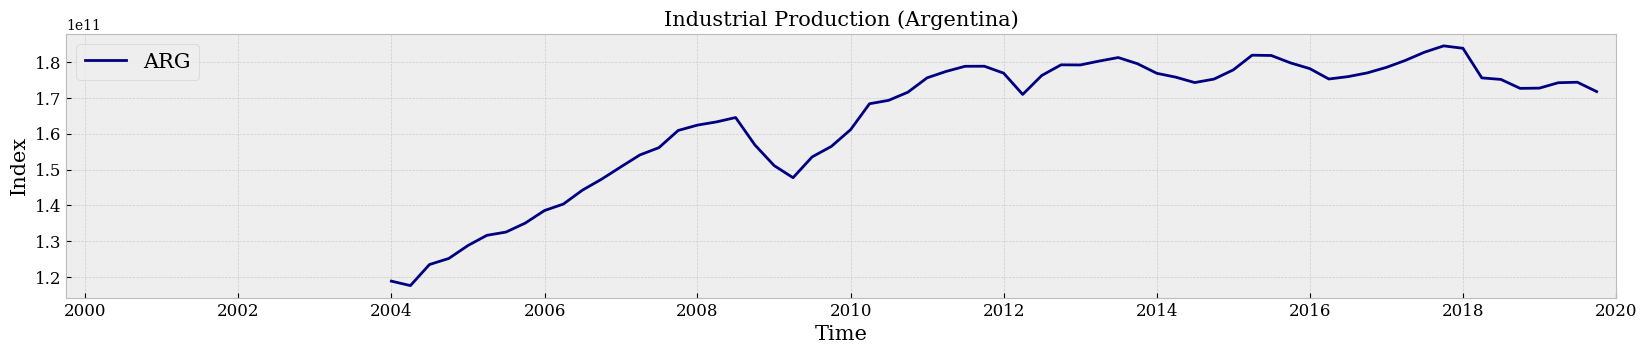

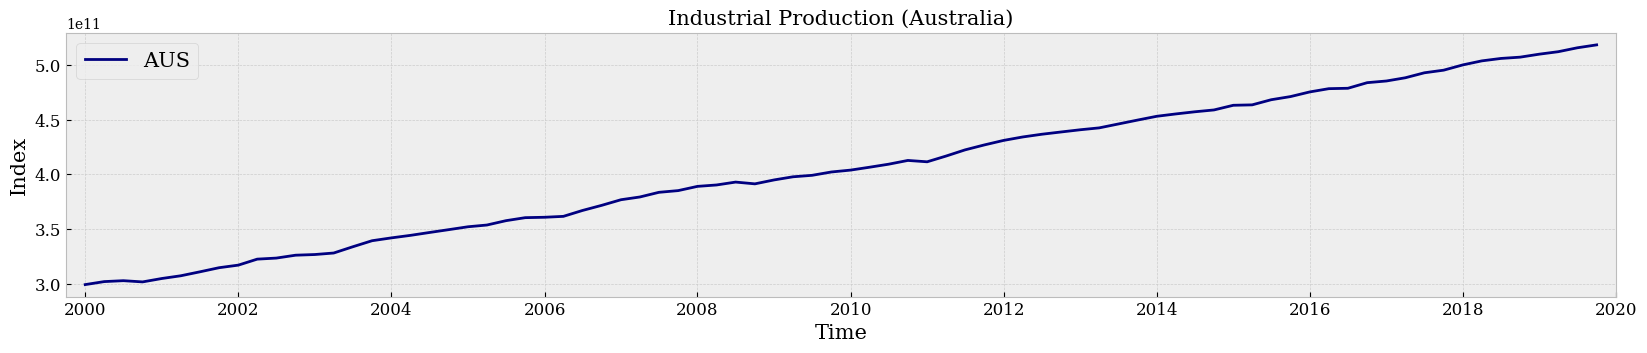

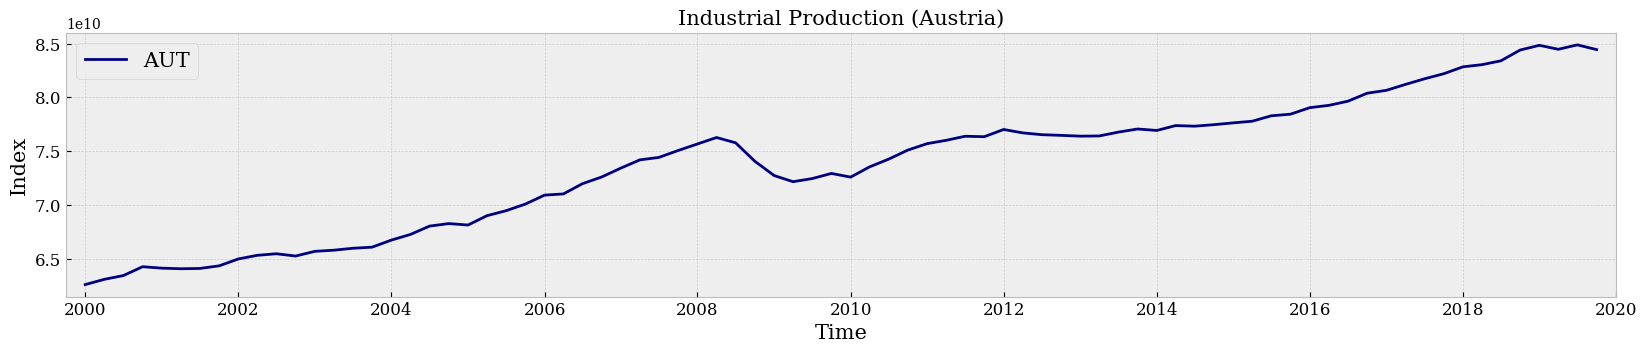

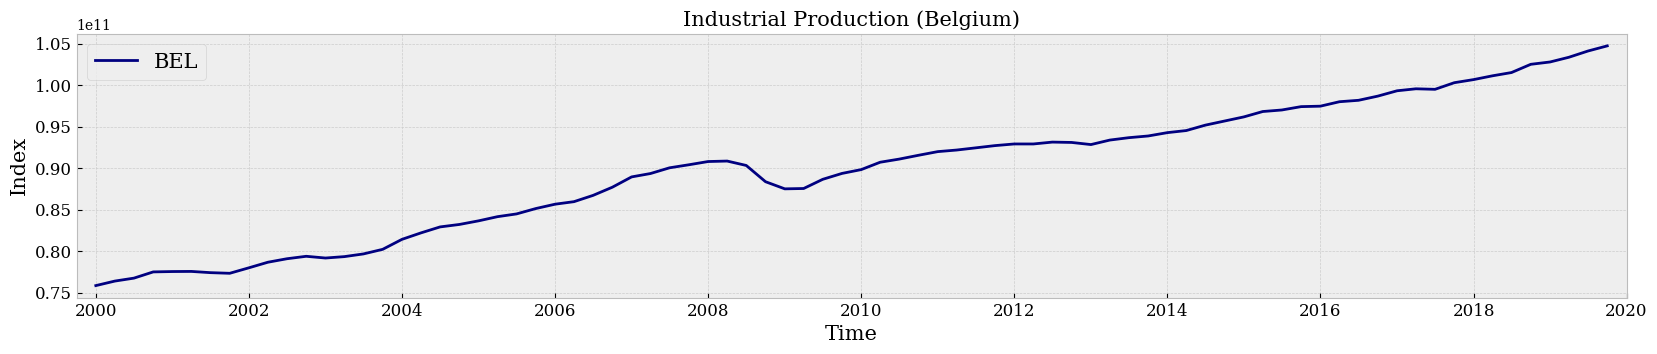

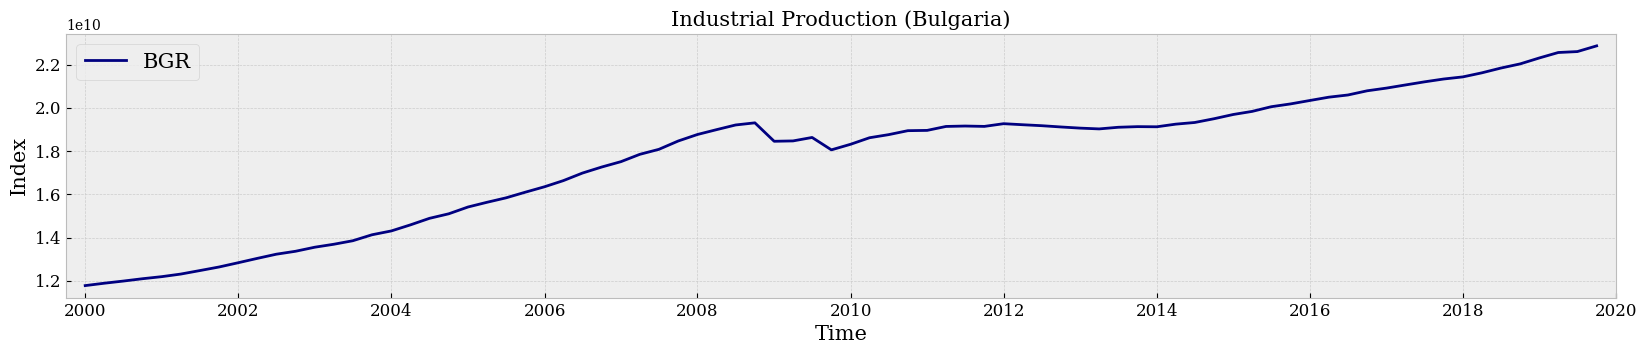

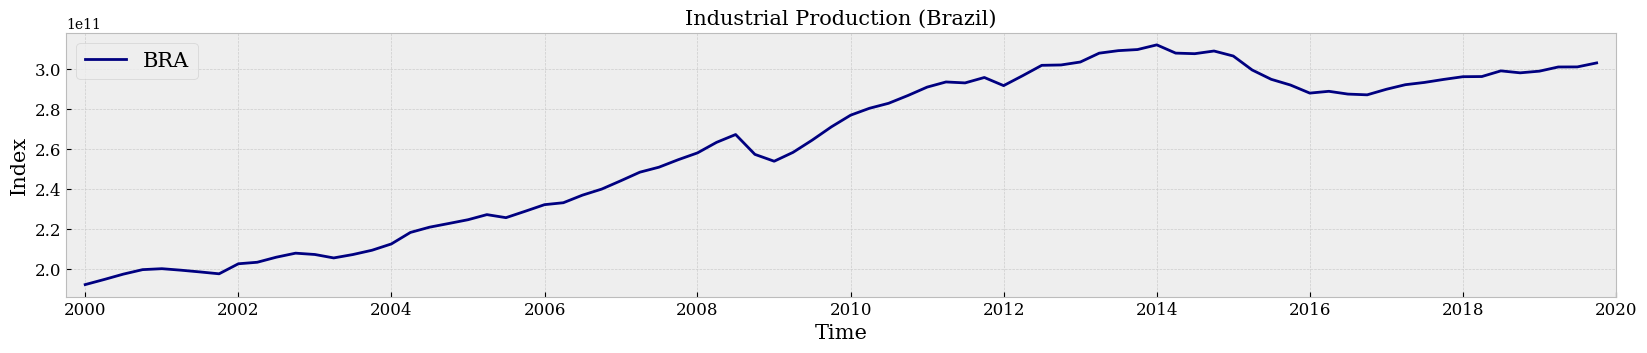

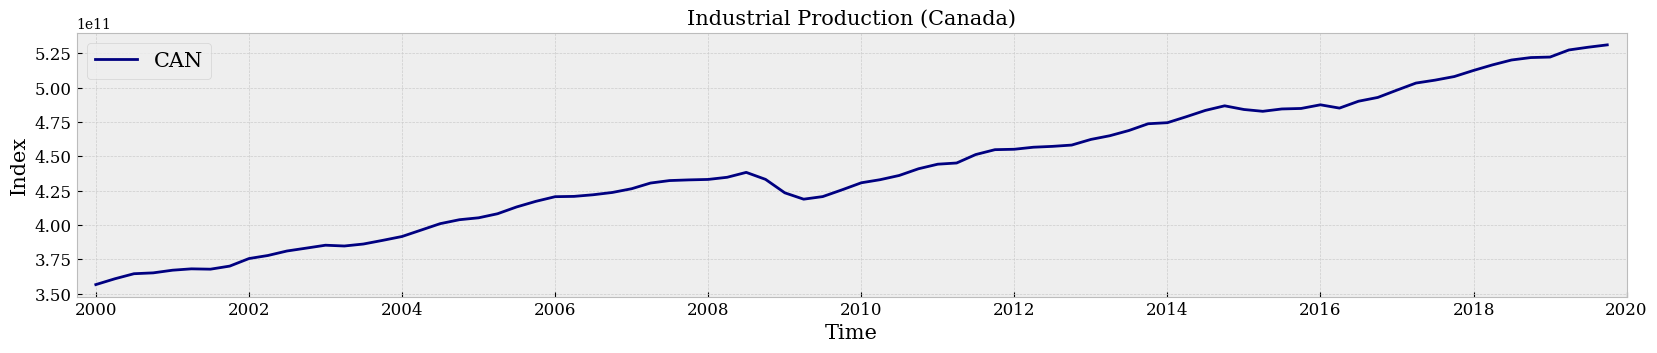

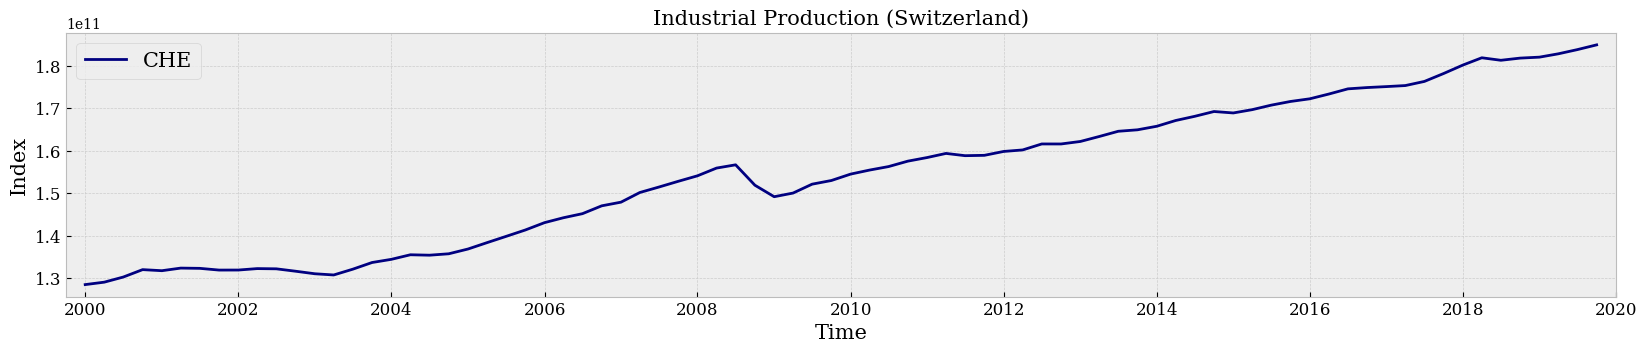

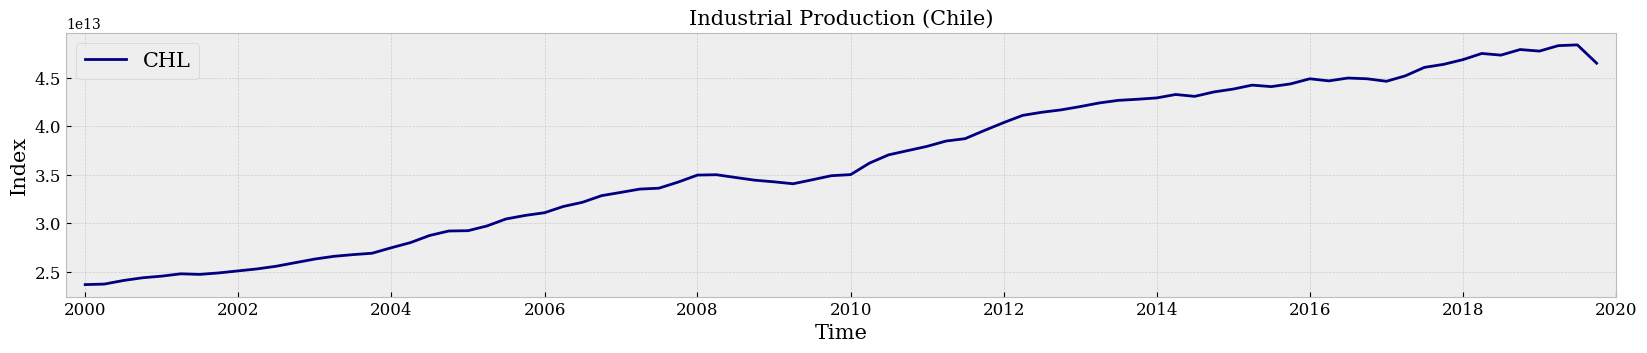

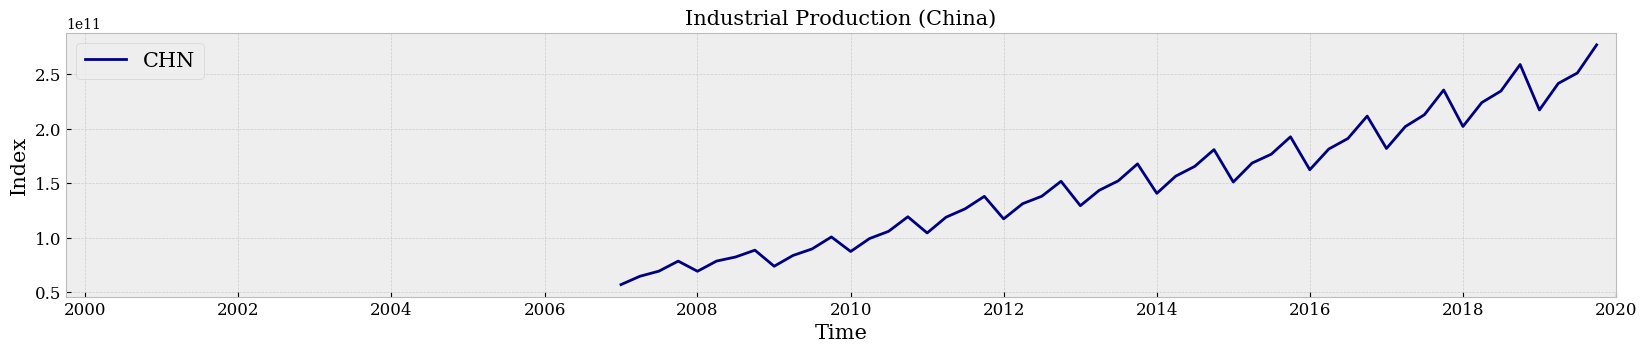

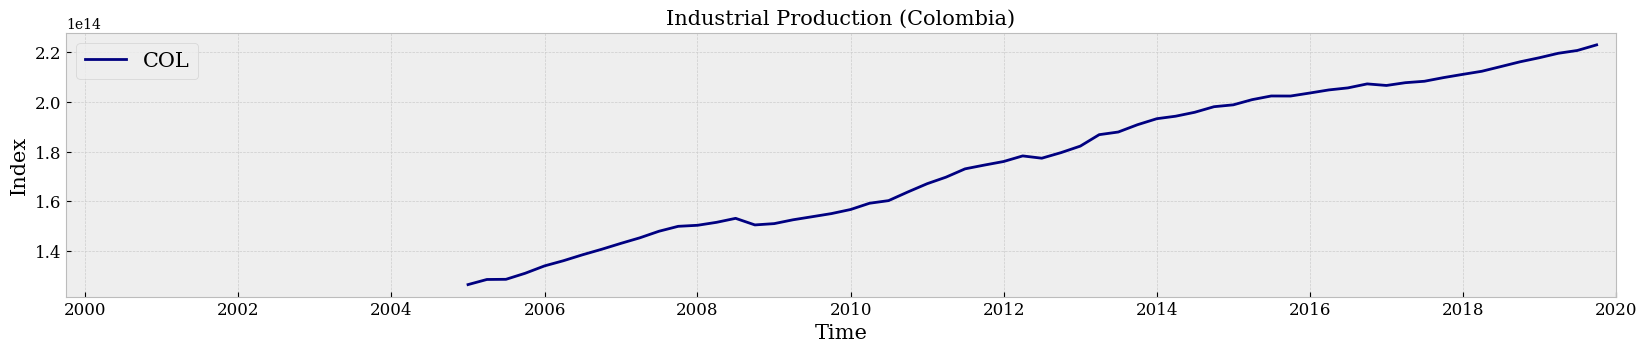

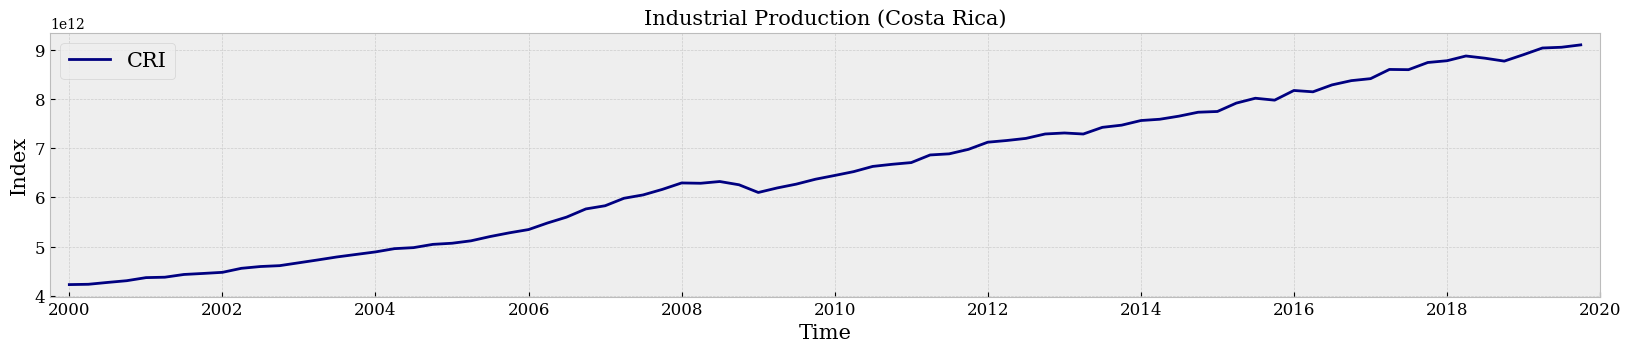

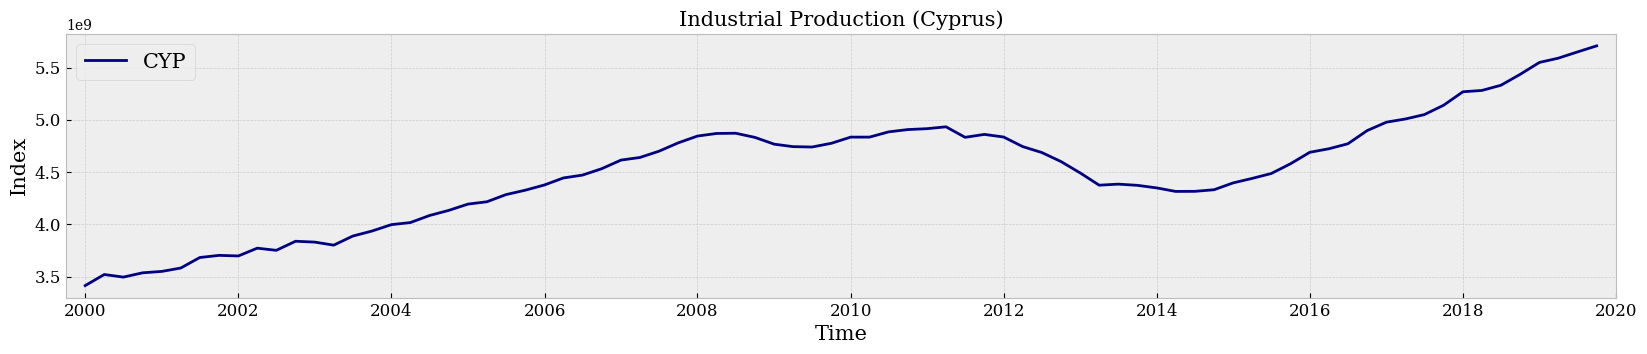

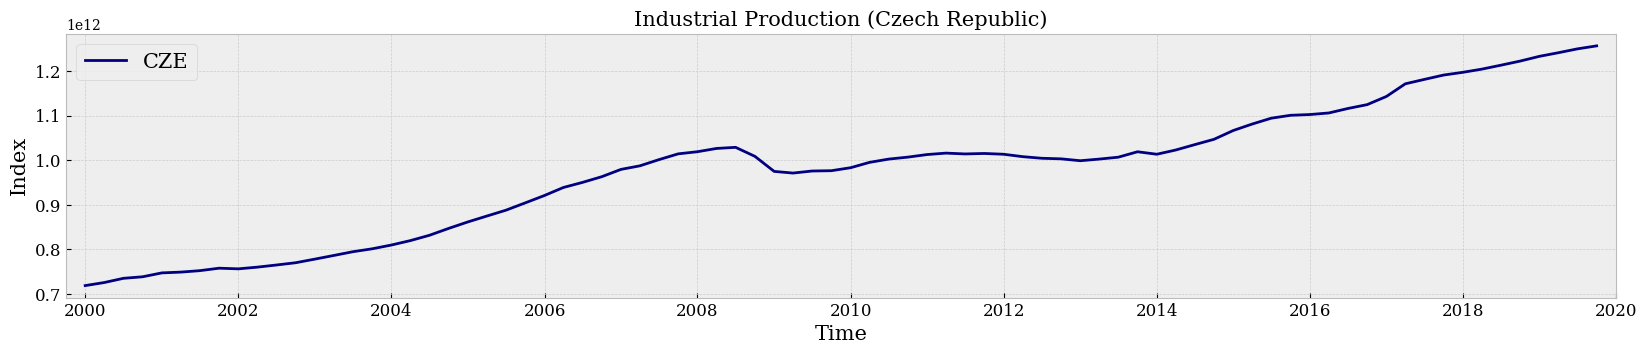

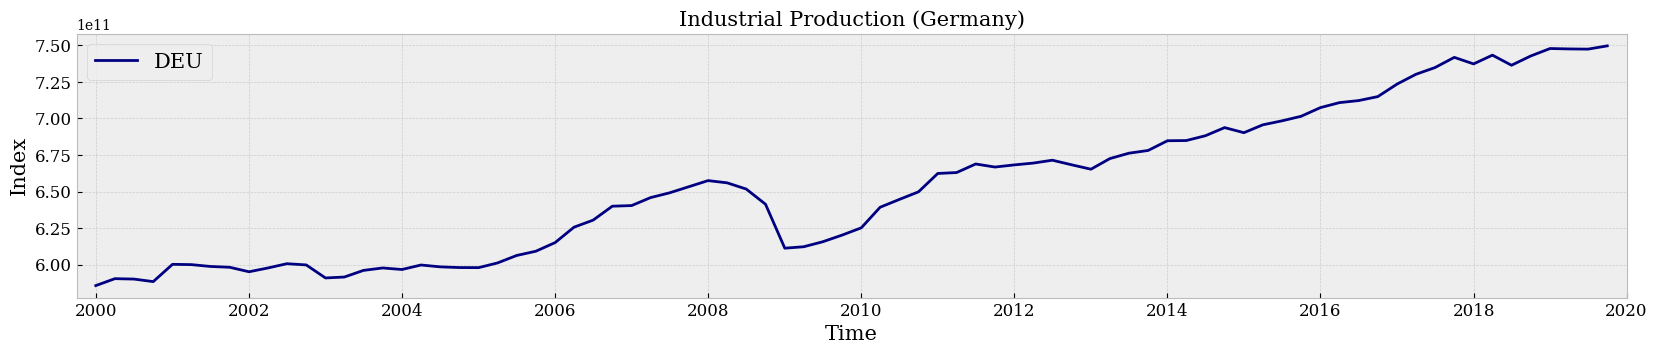

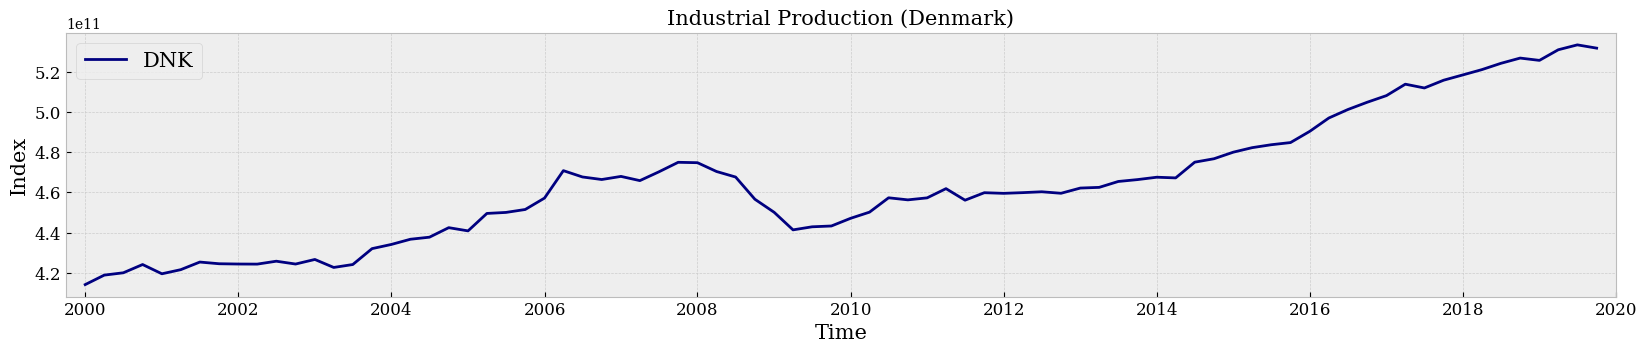

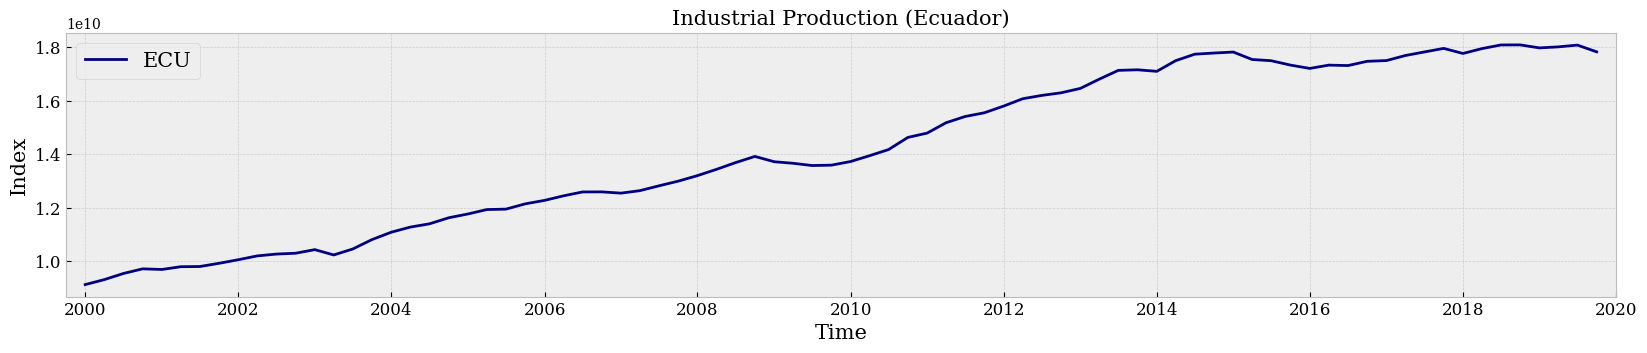

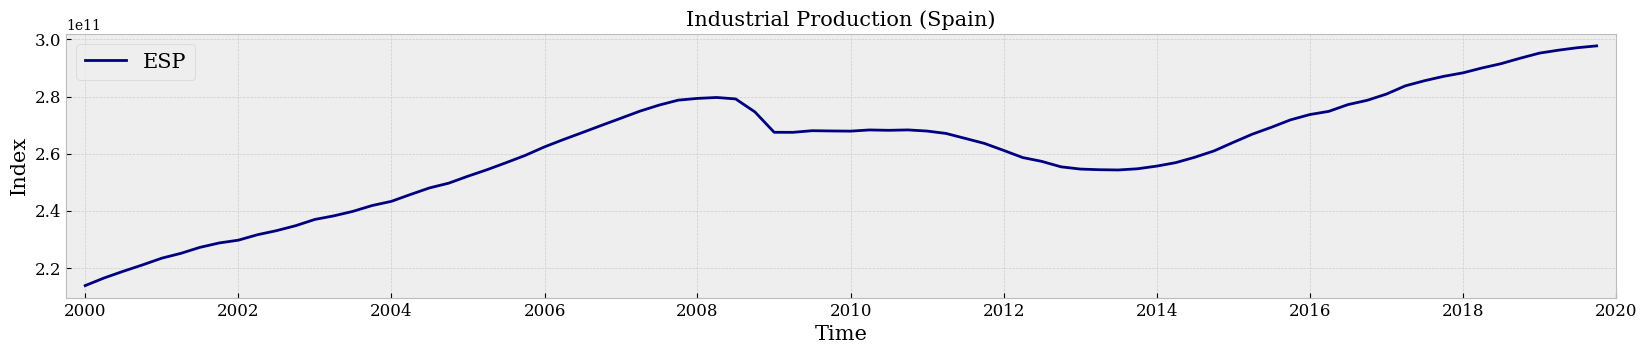

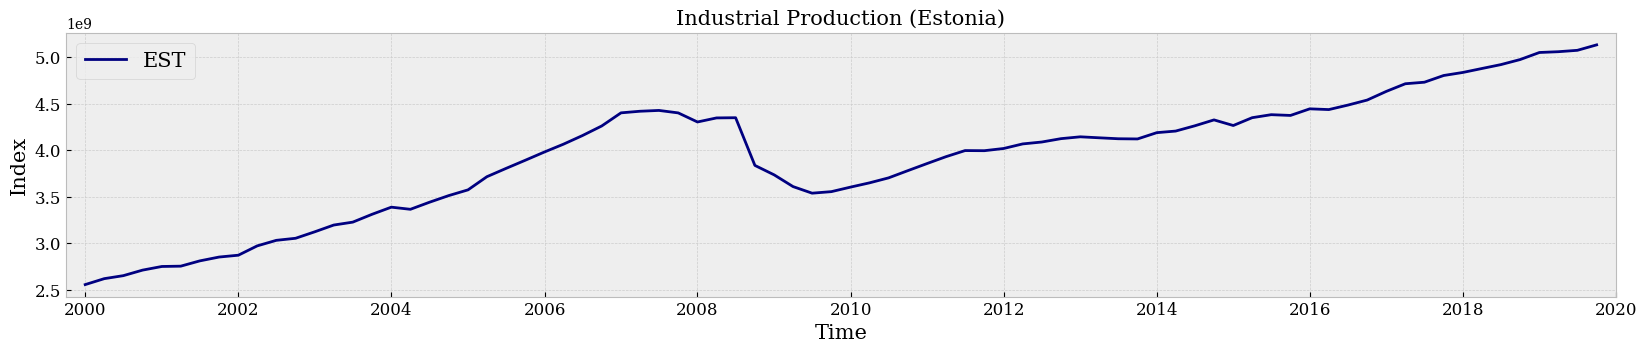

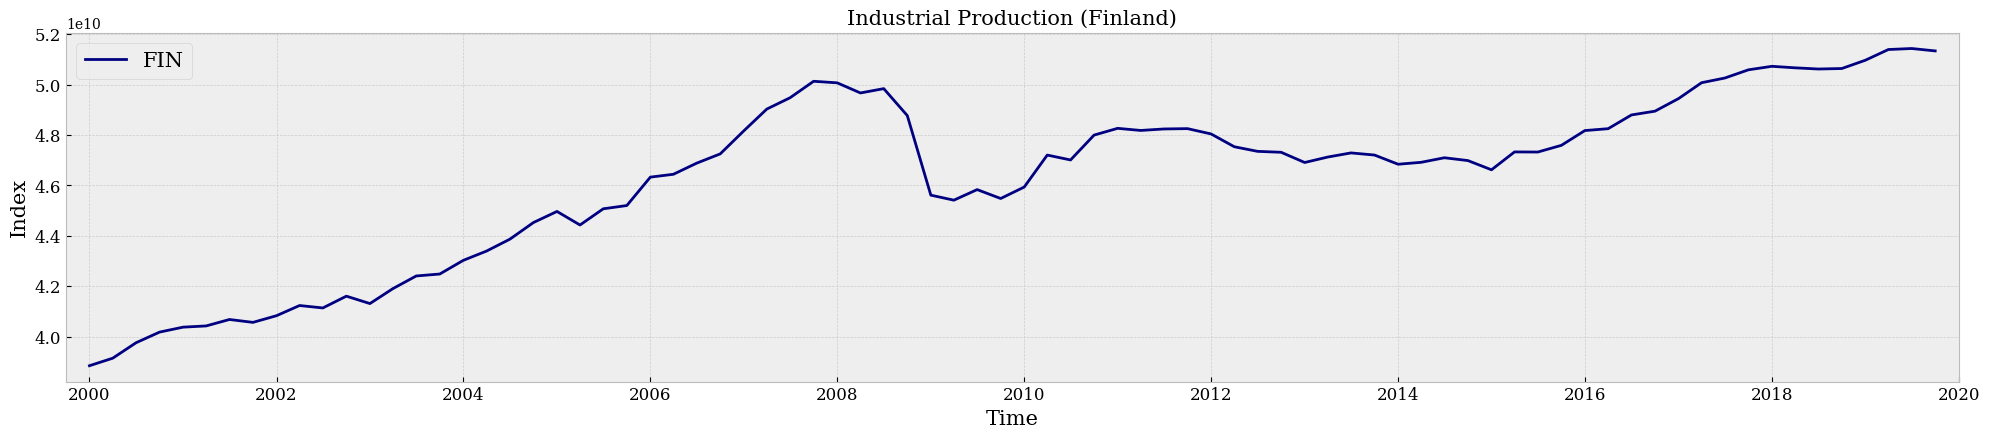

In [27]:
# check the seasonality of gdp

warnings.filterwarnings(action='ignore')

for i in tqdm(range(0, 20)):

    plt.figure(figsize=(20, 250)).set_facecolor('white')

    plt.style.use('bmh')
    plt.style.context('seaborn-paper')

    sns.set_style({'grid.color': '.8',
                  'font.family':'serif',
                  'font.serif':['Times New Roman']})

    plt.subplot(data['isocode'].unique().shape[0], 1, i+1)
    plt.title('Industrial Production ({})'.format(data['country'].unique()[i]), fontsize=15)

    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]
    globals()['data_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_isocode{}'.format(i+1)]['quarter'], globals()['data_isocode{}'.format(i+1)]['gdp'], label=globals()['data_isocode{}'.format(i+1)]['isocode'].unique()[0], color='navy')

    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Index', fontsize=15)
    plt.xlim([dt.date(1999, 10, 1), dt.date(2020, 1, 1)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', ncol=1, fontsize=15)

plt.tight_layout()
# plt.grid()

100%|██████████| 20/20 [00:04<00:00,  4.73it/s]


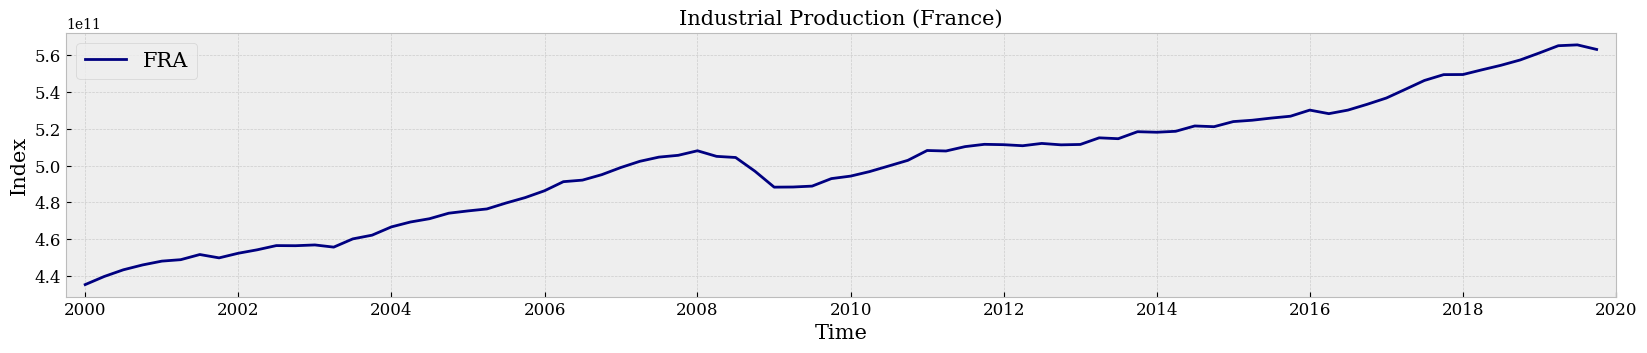

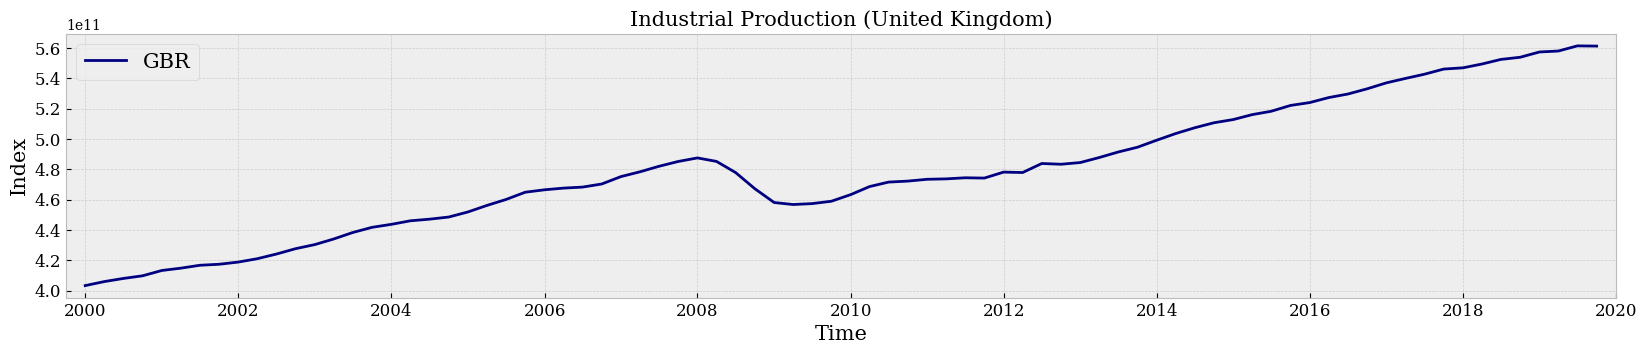

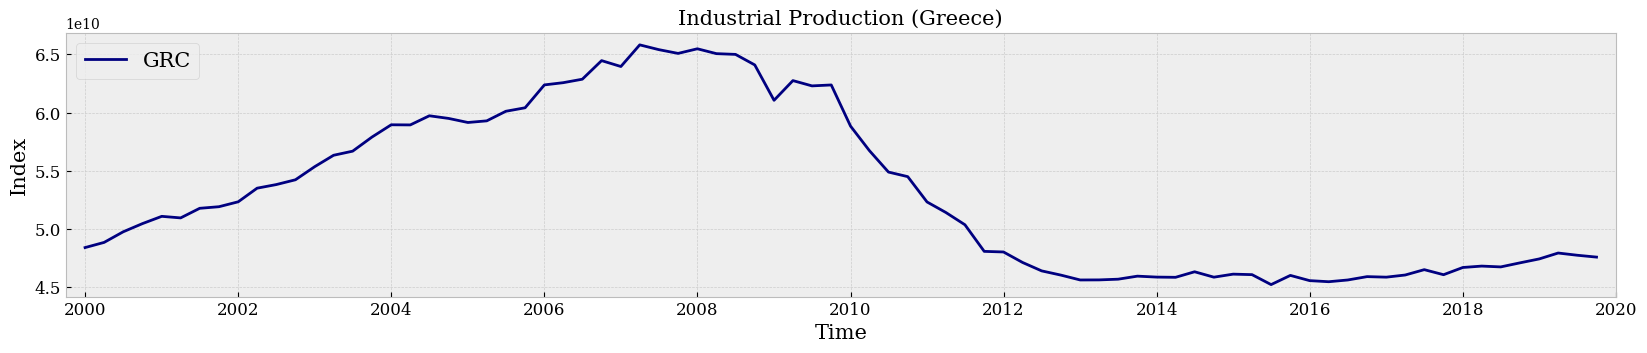

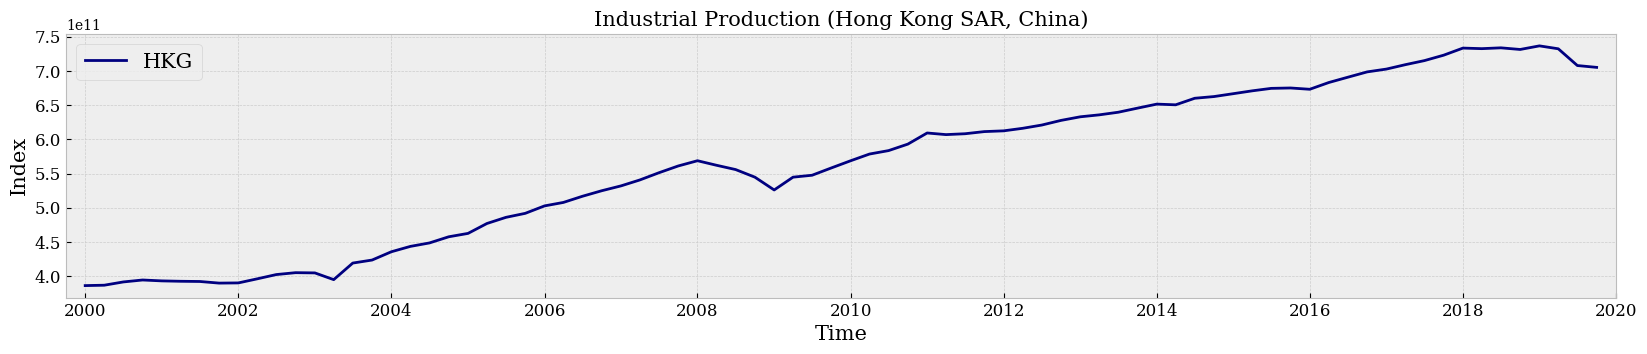

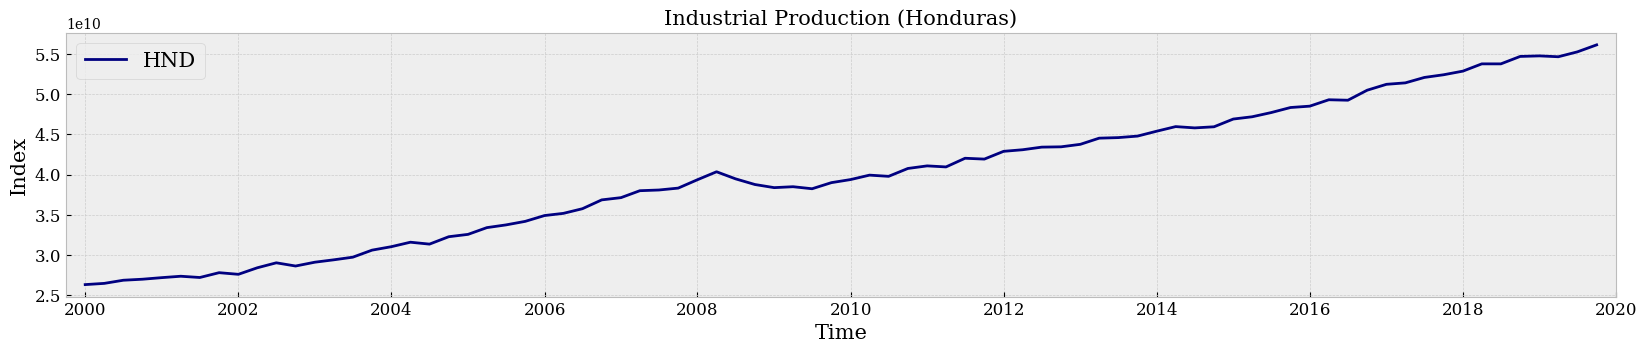

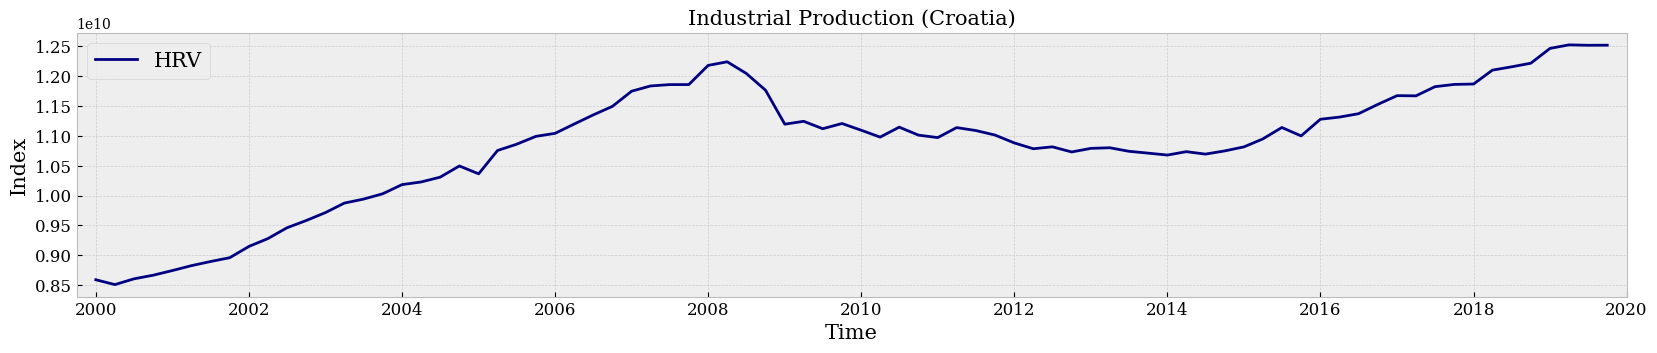

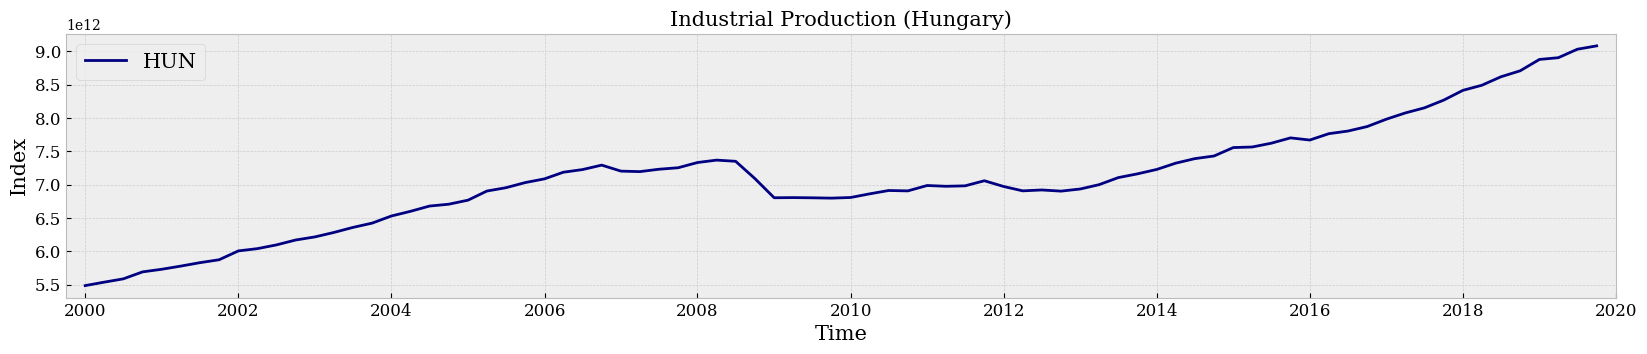

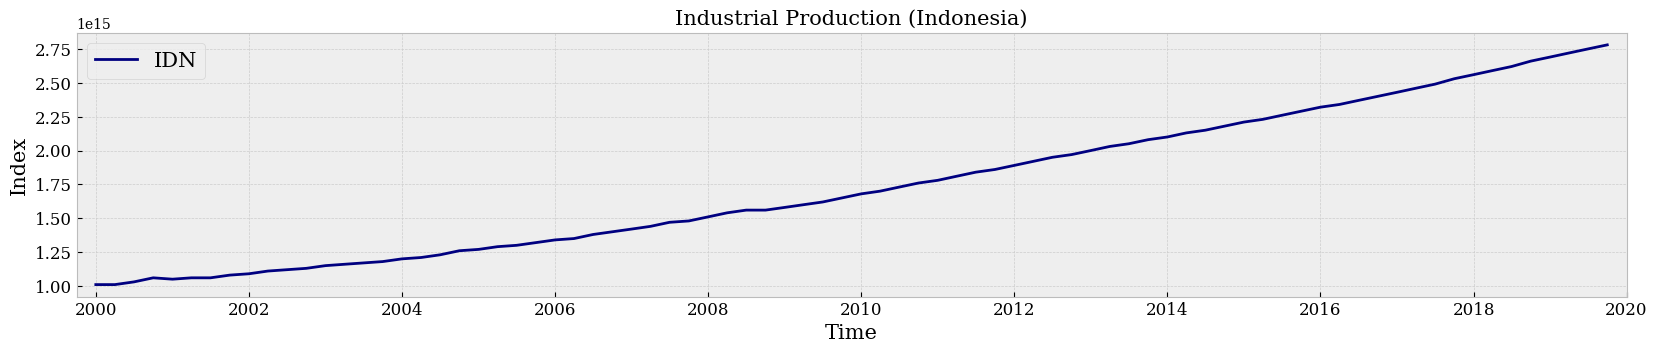

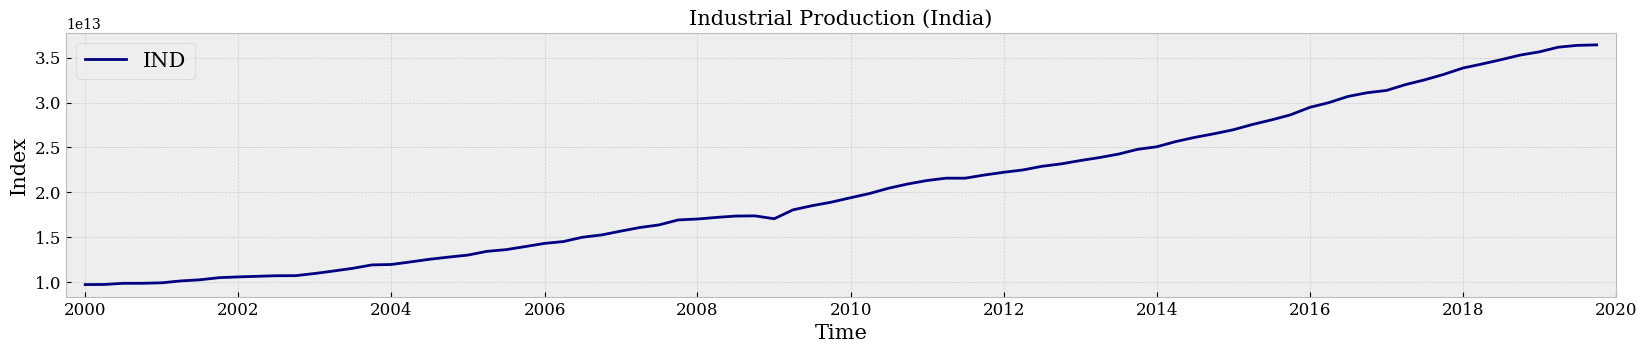

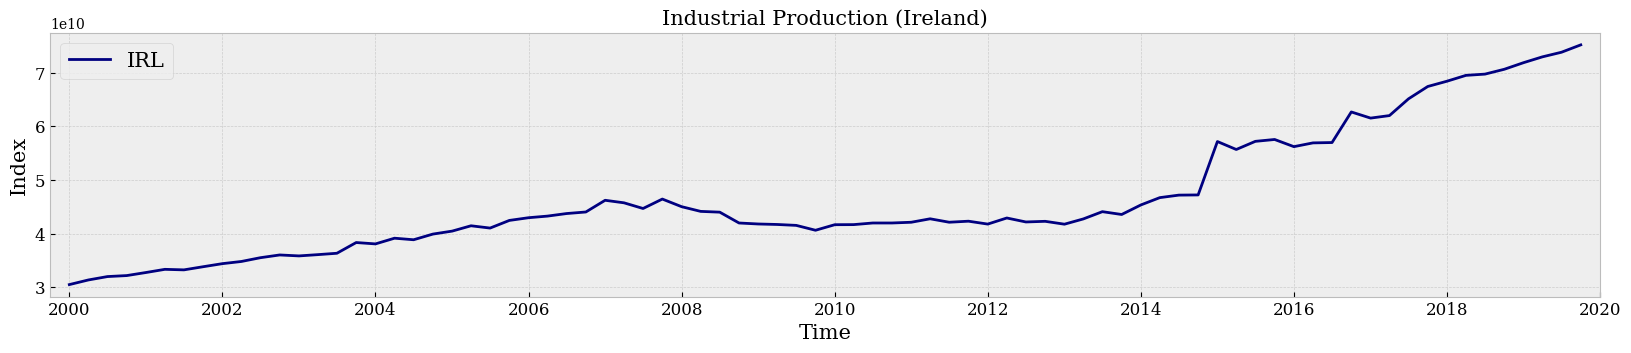

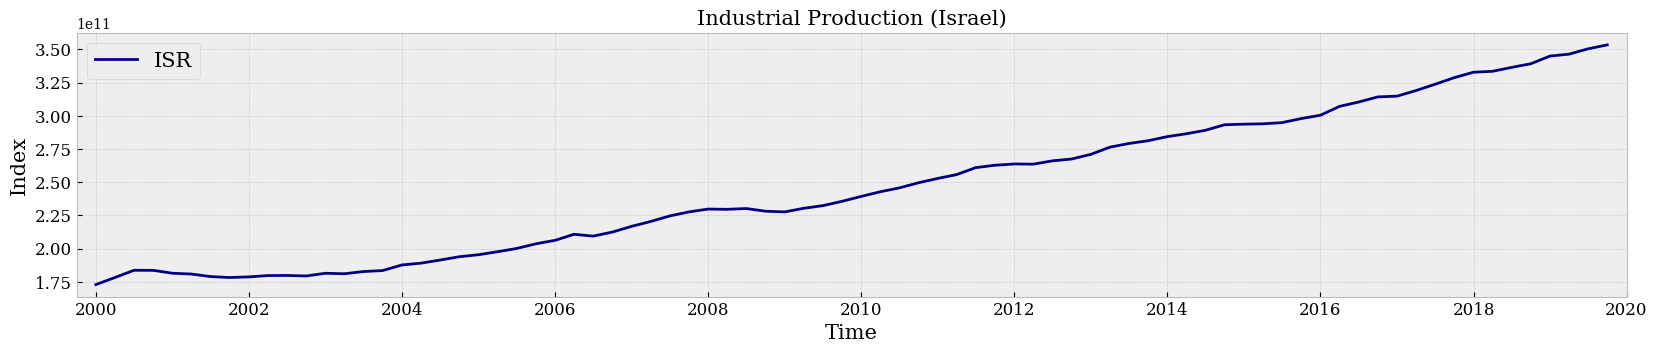

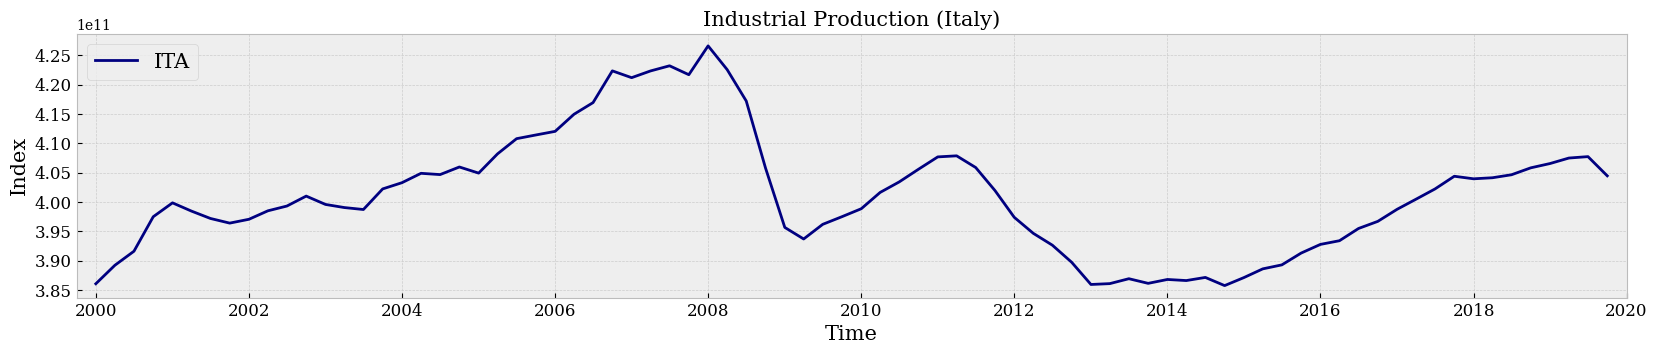

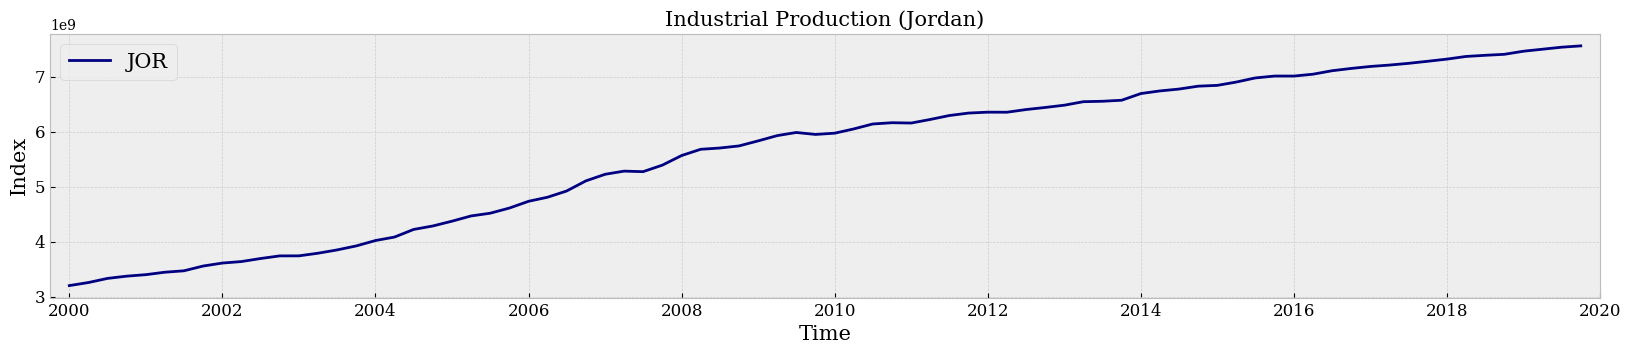

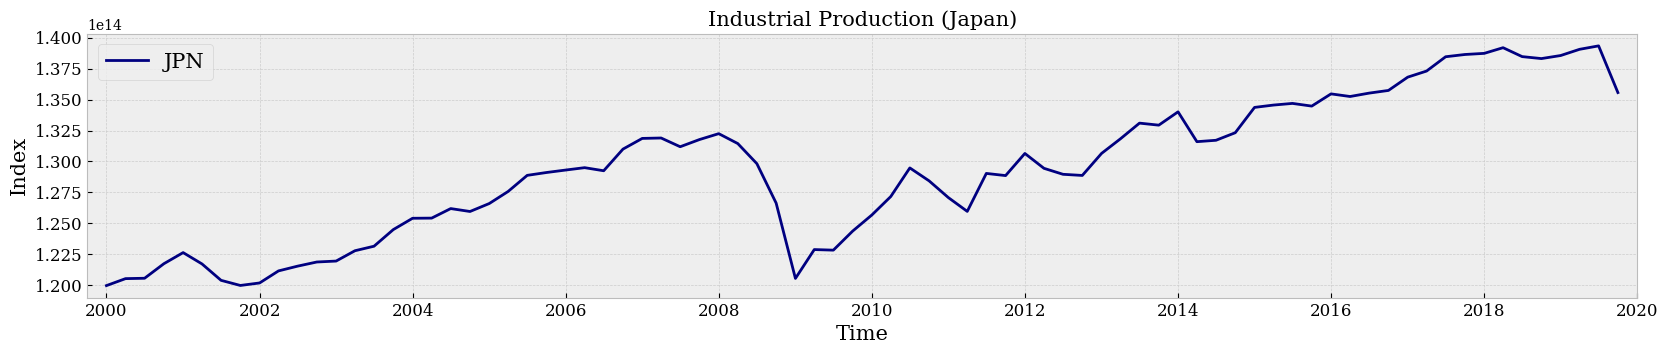

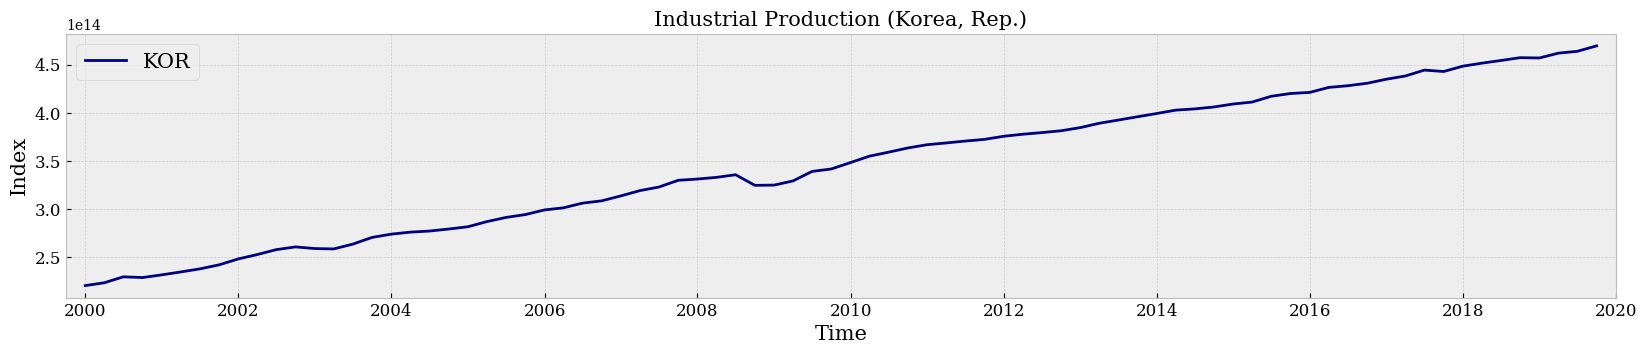

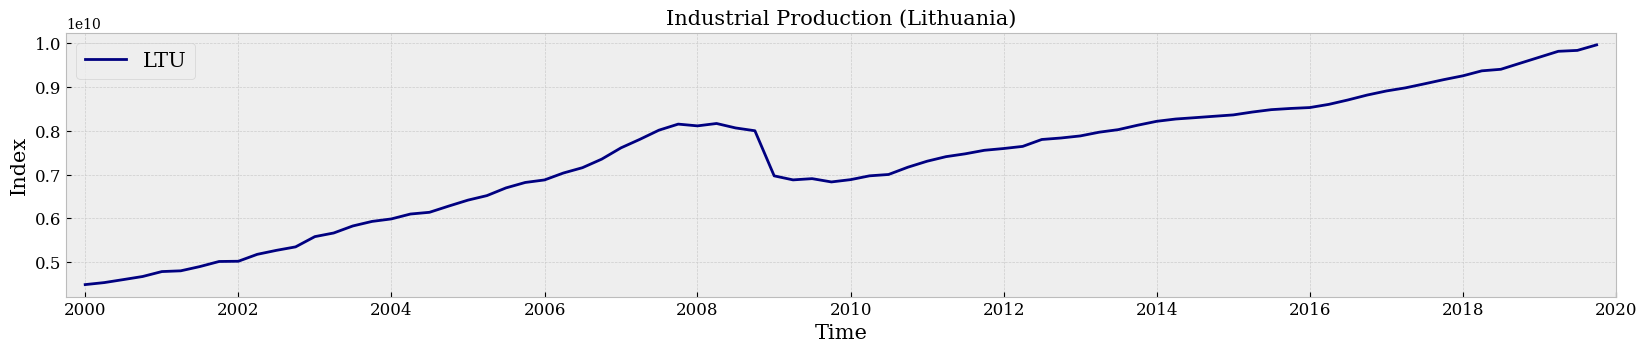

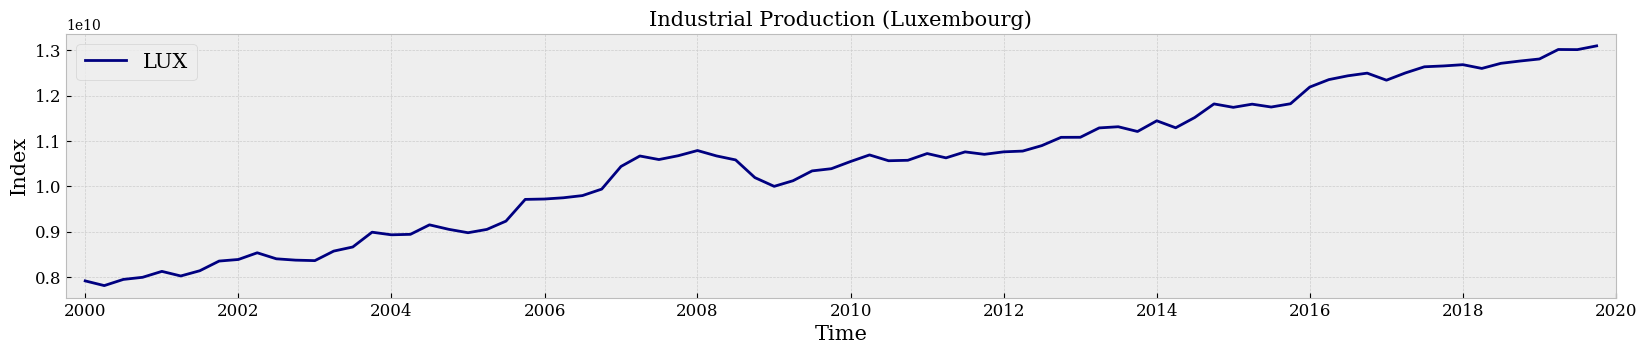

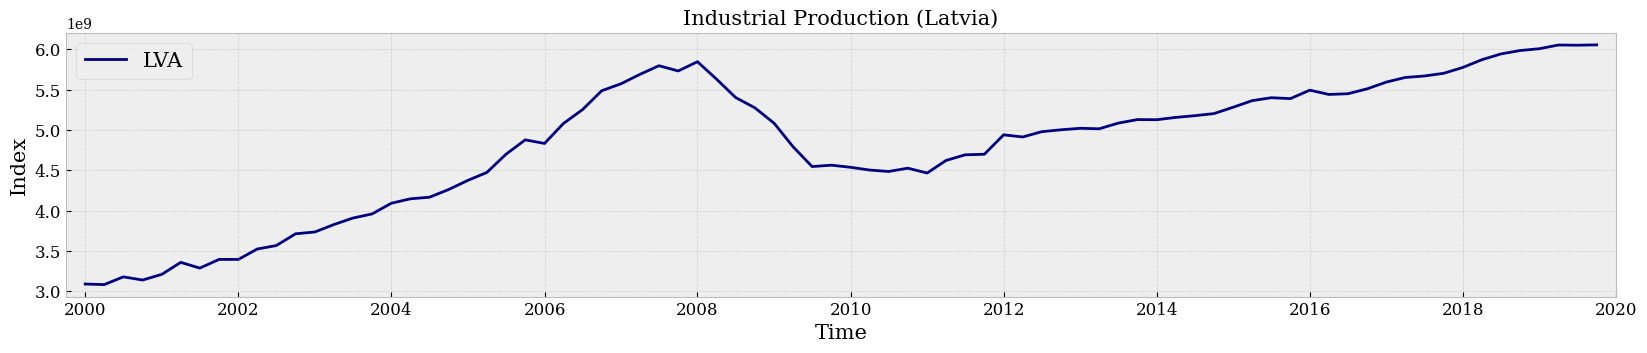

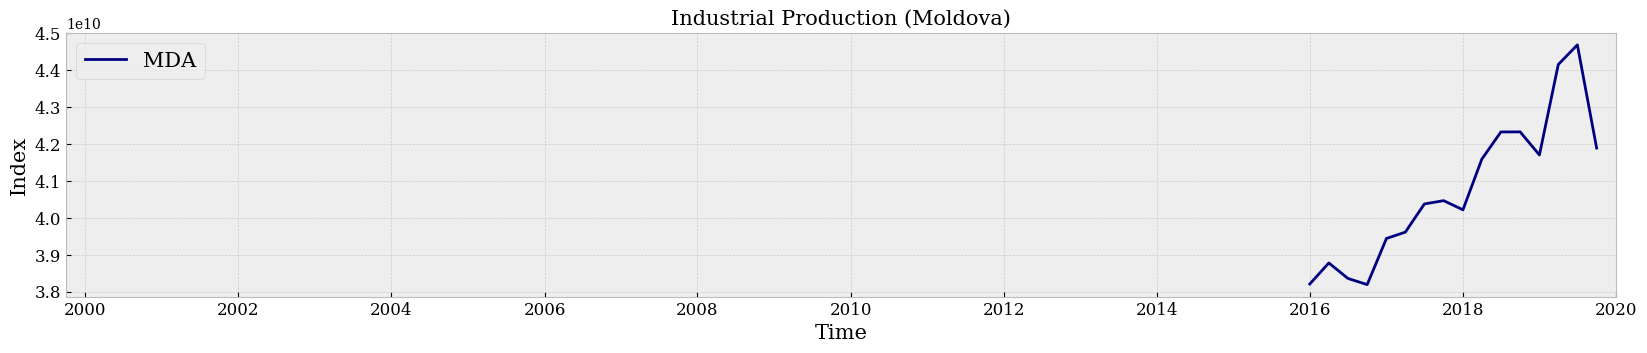

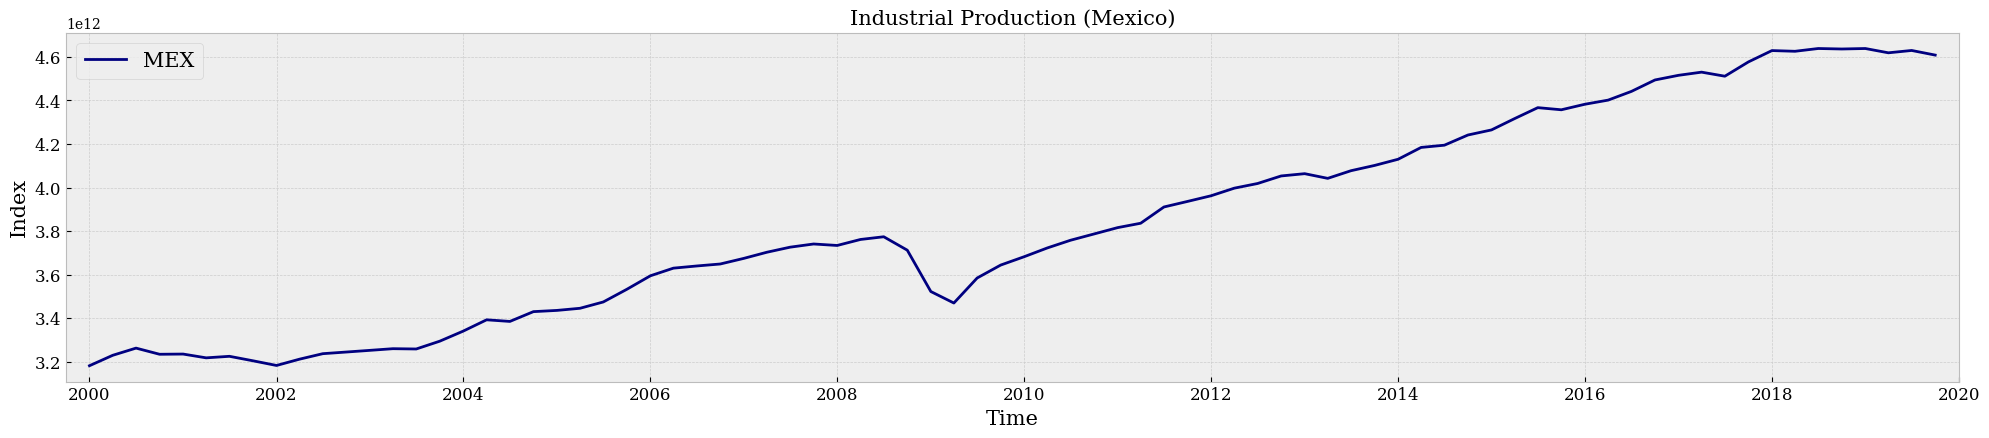

In [29]:
# check the seasonality of ip

warnings.filterwarnings(action='ignore')

for i in tqdm(range(20, 40)):

    plt.figure(figsize=(20, 250)).set_facecolor('white')

    plt.style.use('bmh')
    plt.style.context('seaborn-paper')

    sns.set_style({'grid.color': '.8',
                  'font.family':'serif',
                  'font.serif':['Times New Roman']})

    plt.subplot(data['isocode'].unique().shape[0], 1, i+1)
    plt.title('Industrial Production ({})'.format(data['country'].unique()[i]), fontsize=15)

    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]
    globals()['data_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_isocode{}'.format(i+1)]['quarter'], globals()['data_isocode{}'.format(i+1)]['gdp'], label=globals()['data_isocode{}'.format(i+1)]['isocode'].unique()[0], color='navy')

    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Index', fontsize=15)
    plt.xlim([dt.date(1999, 10, 1), dt.date(2020, 1, 1)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', ncol=1, fontsize=15)

plt.tight_layout()
# plt.grid()

100%|██████████| 21/21 [00:02<00:00,  8.83it/s]


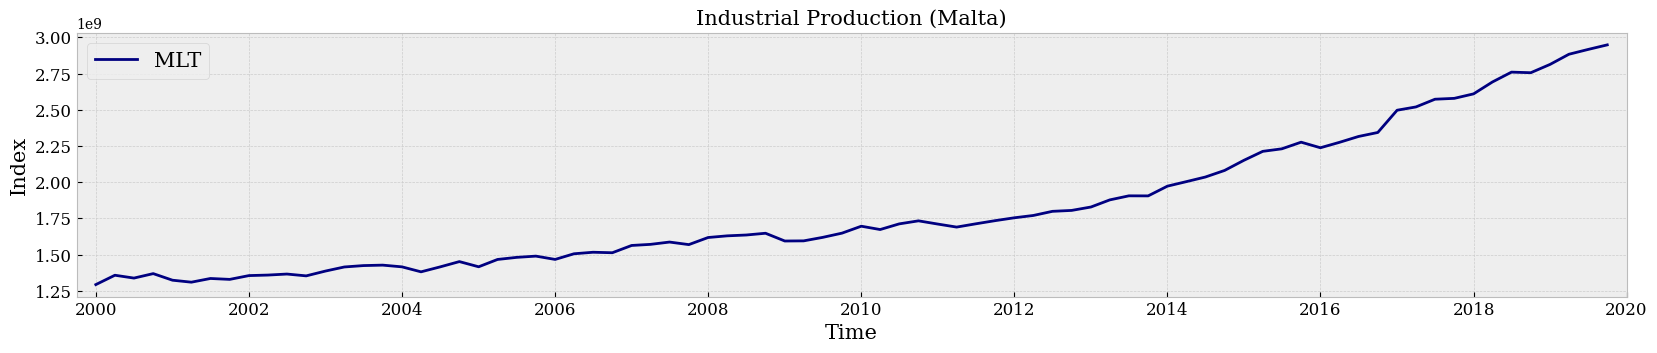

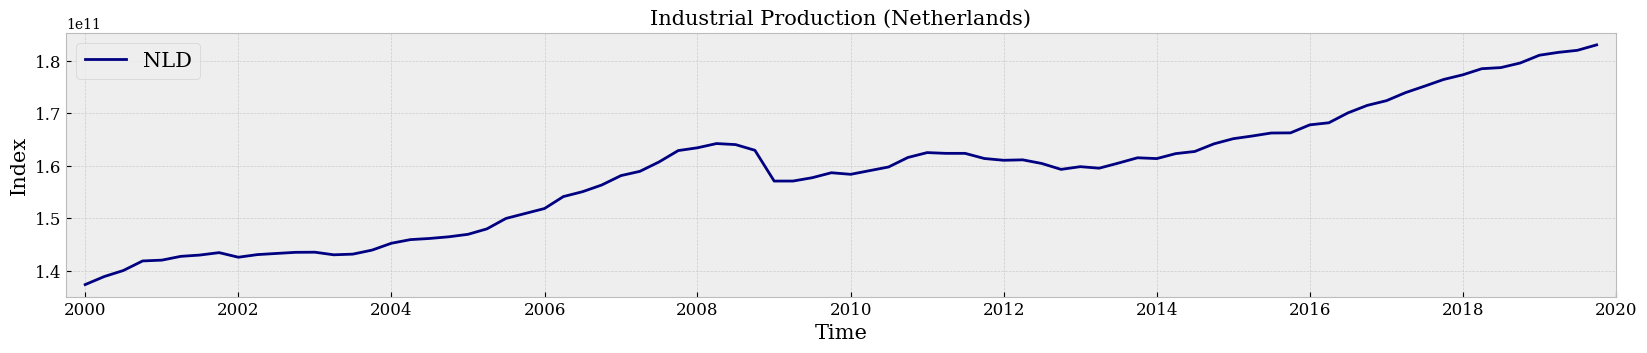

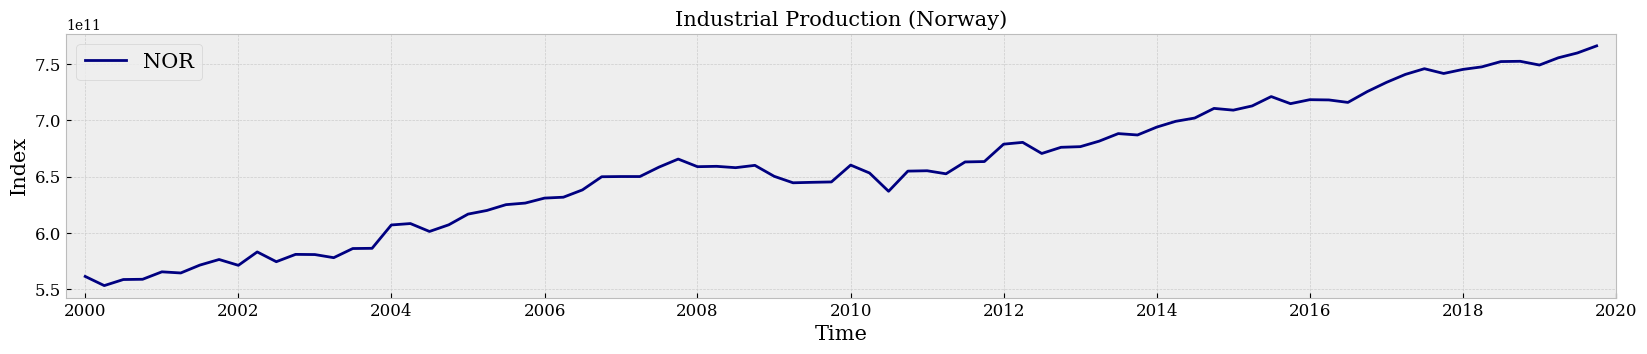

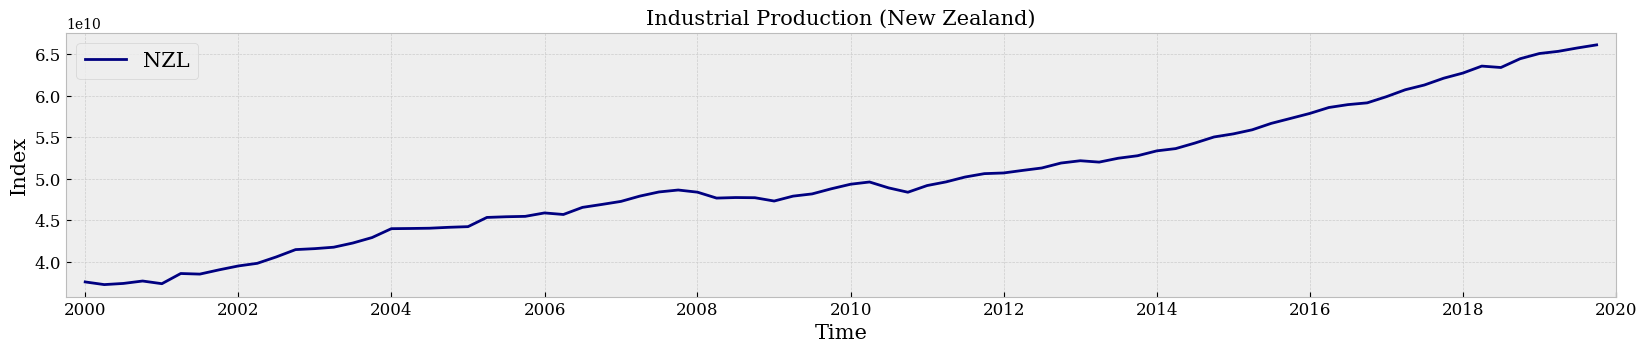

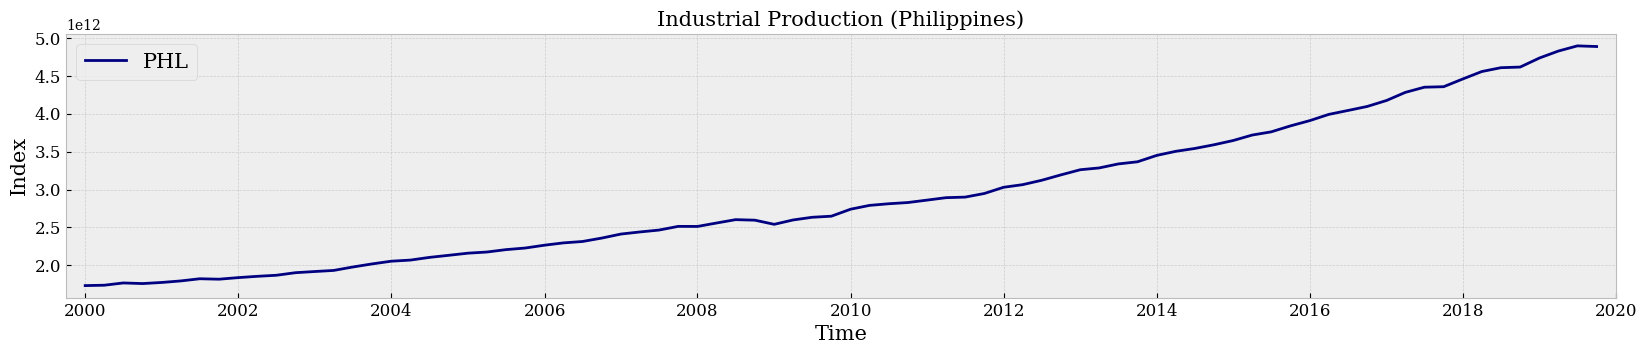

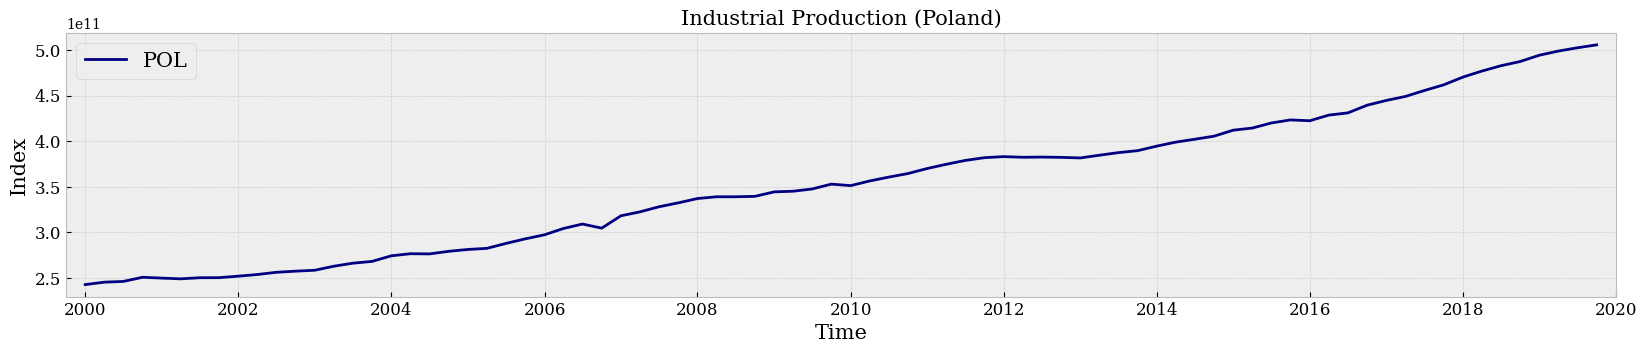

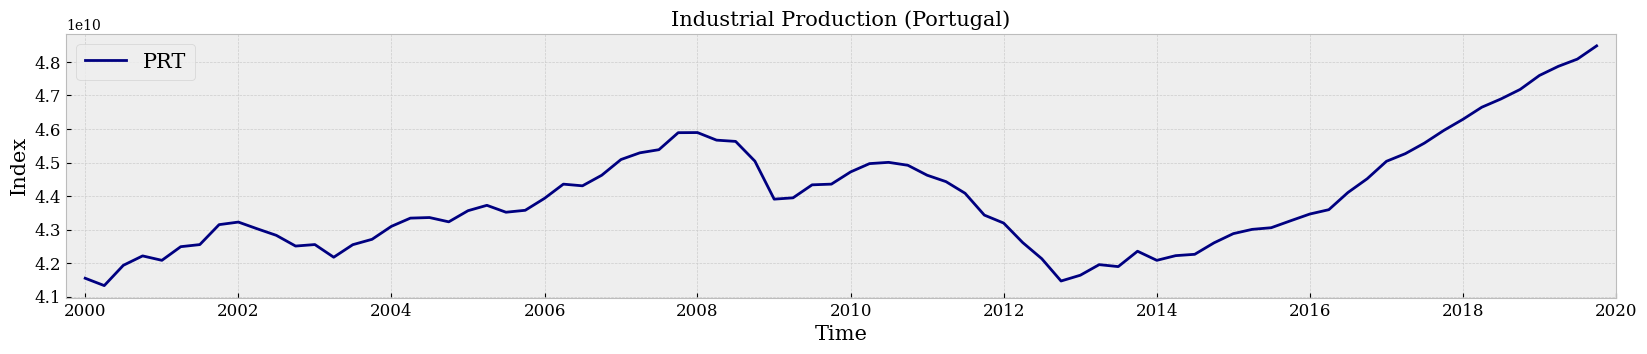

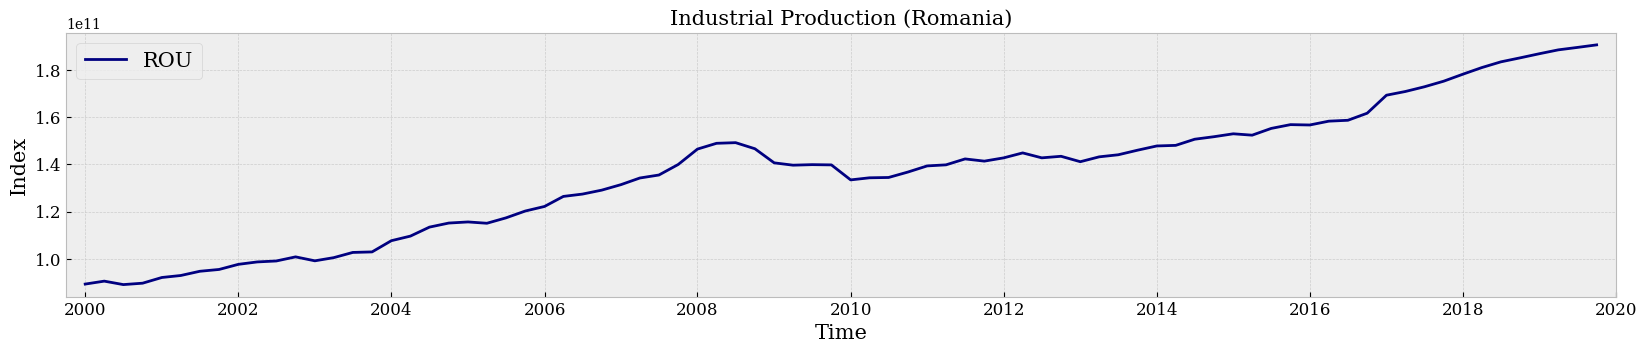

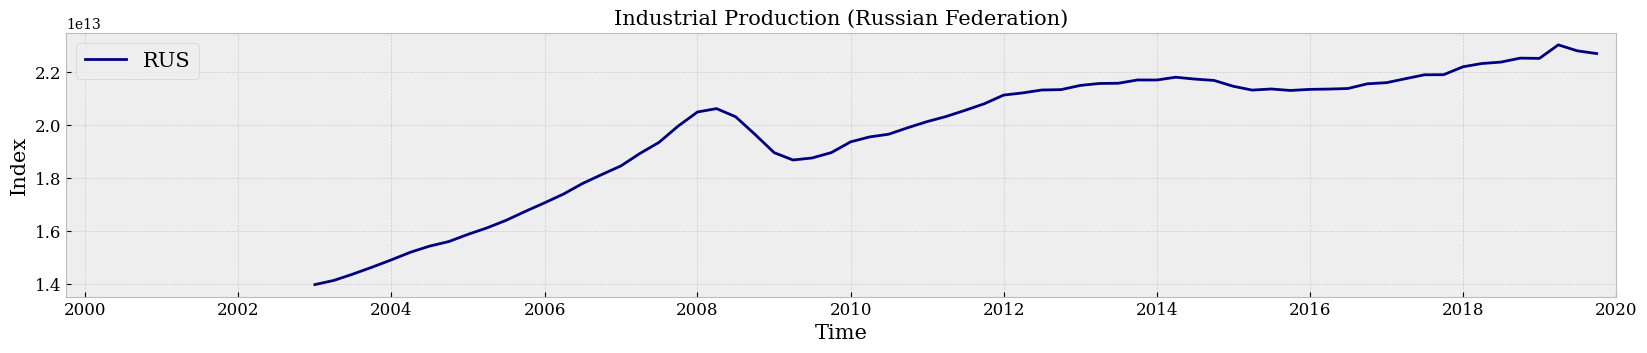

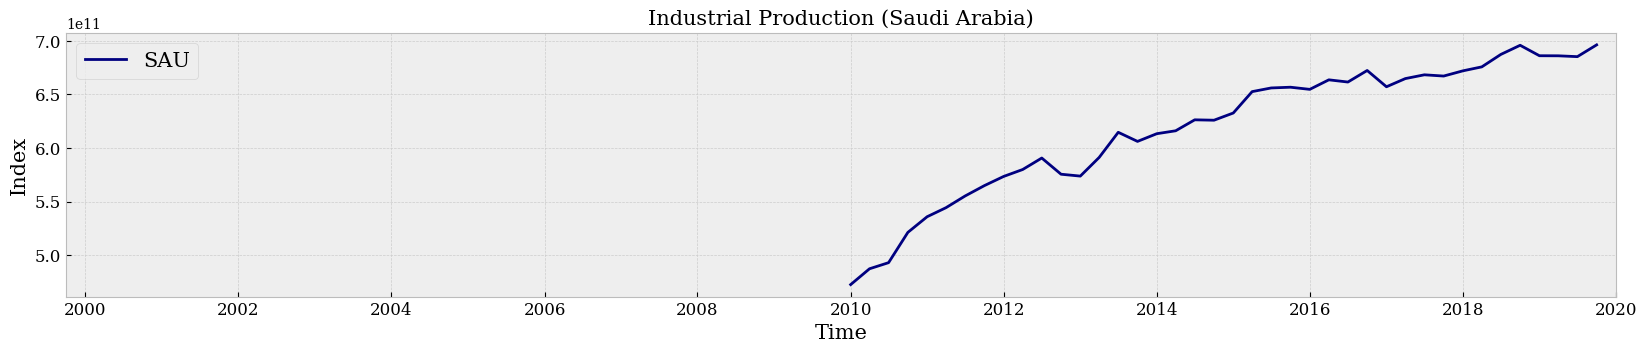

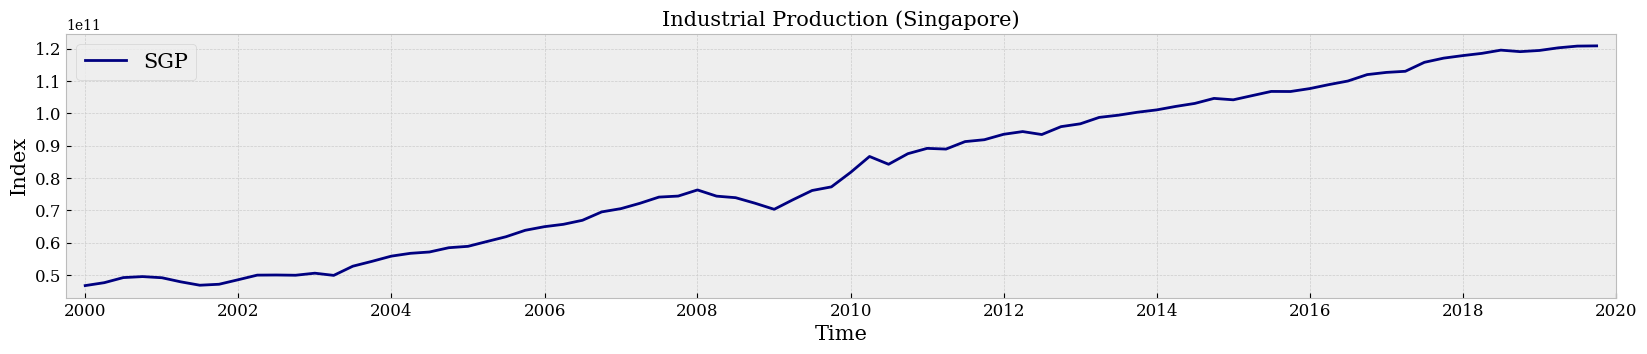

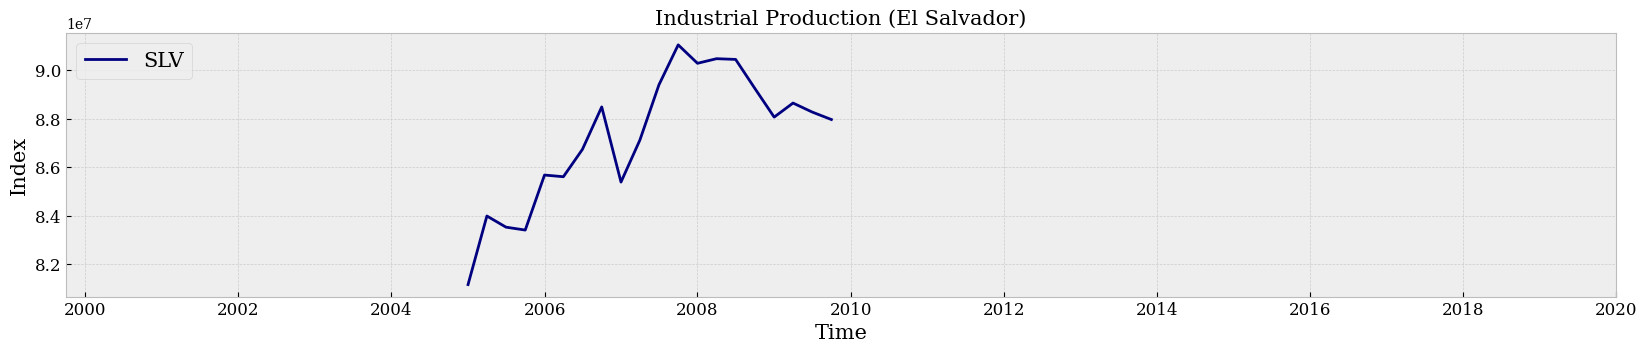

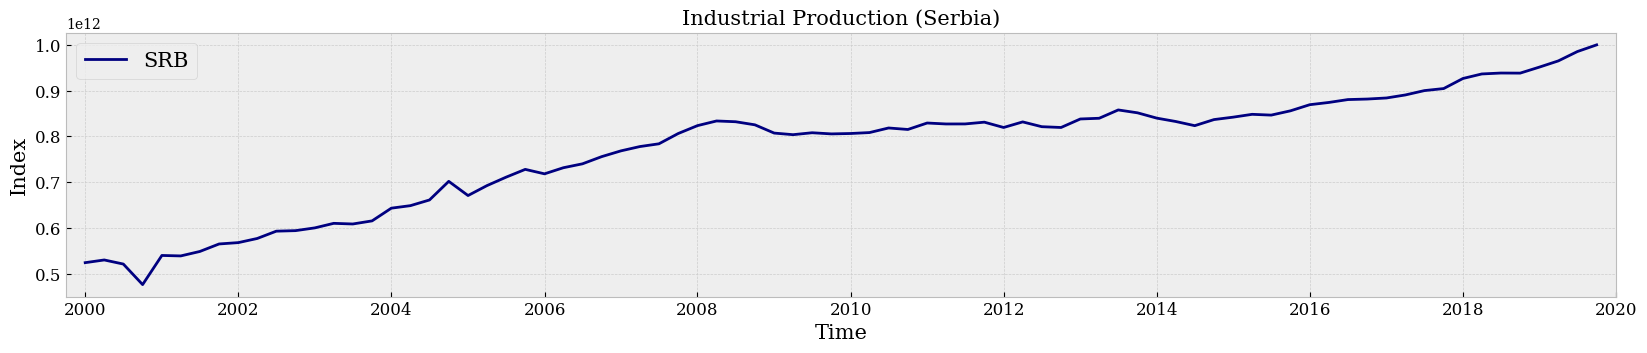

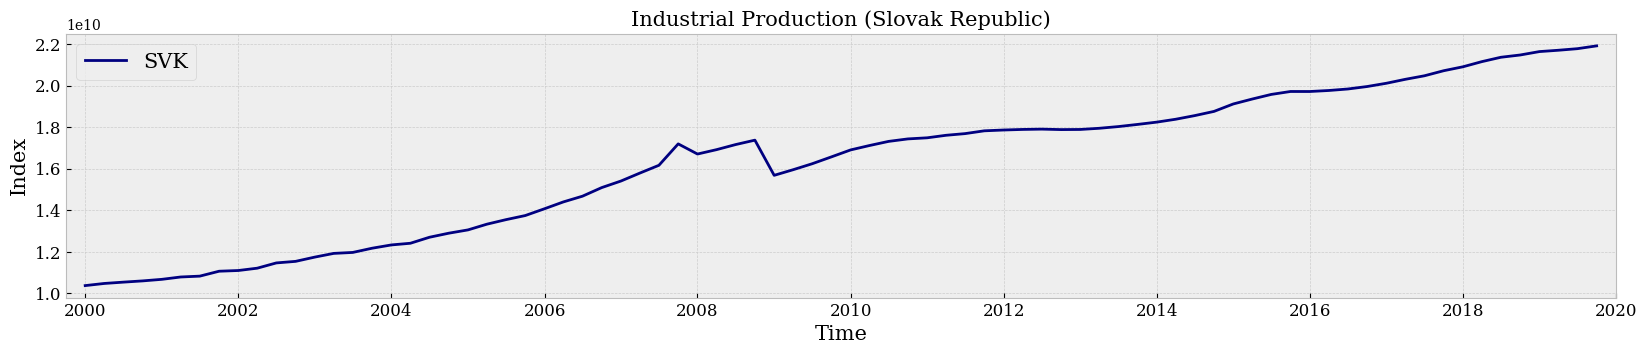

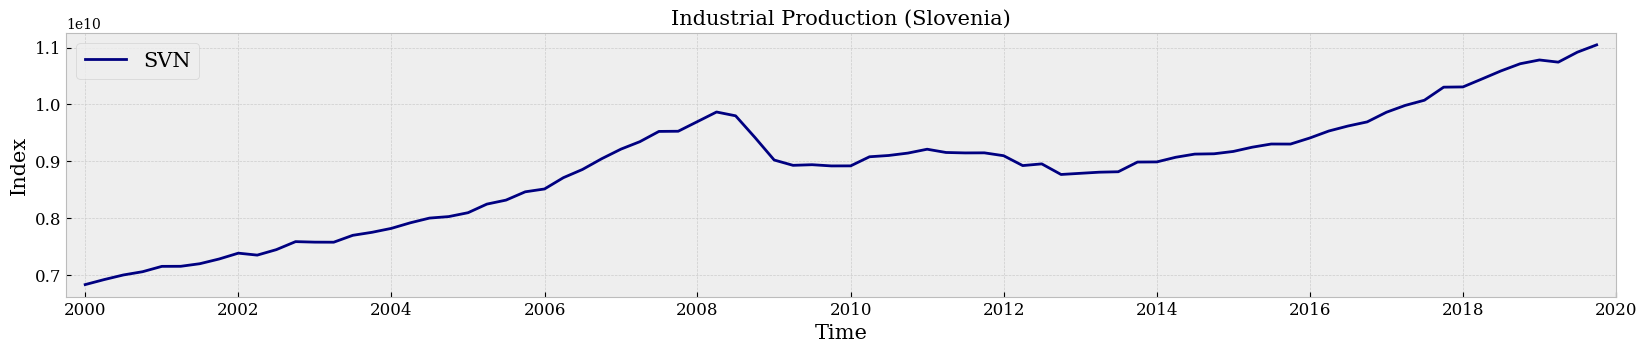

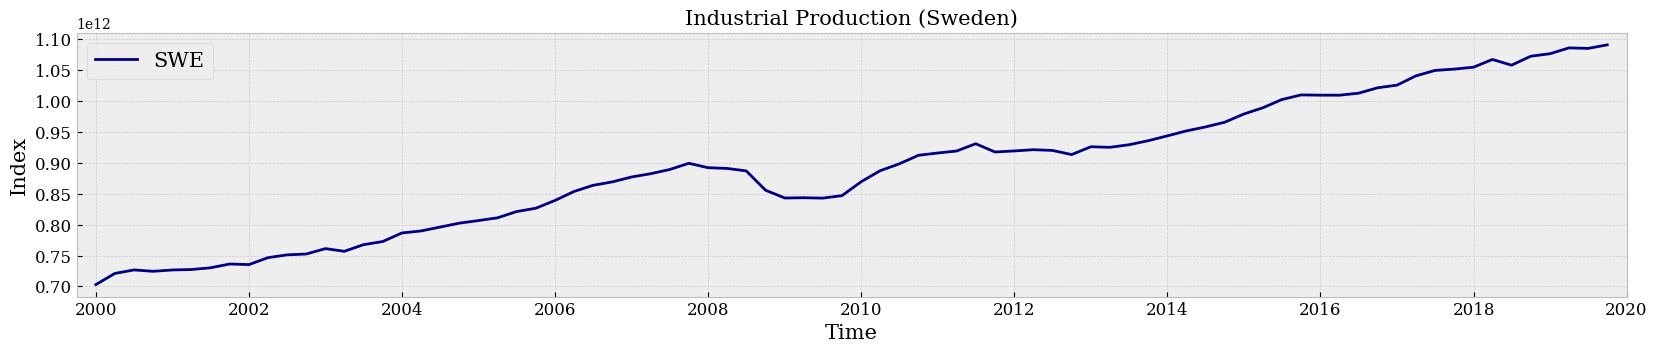

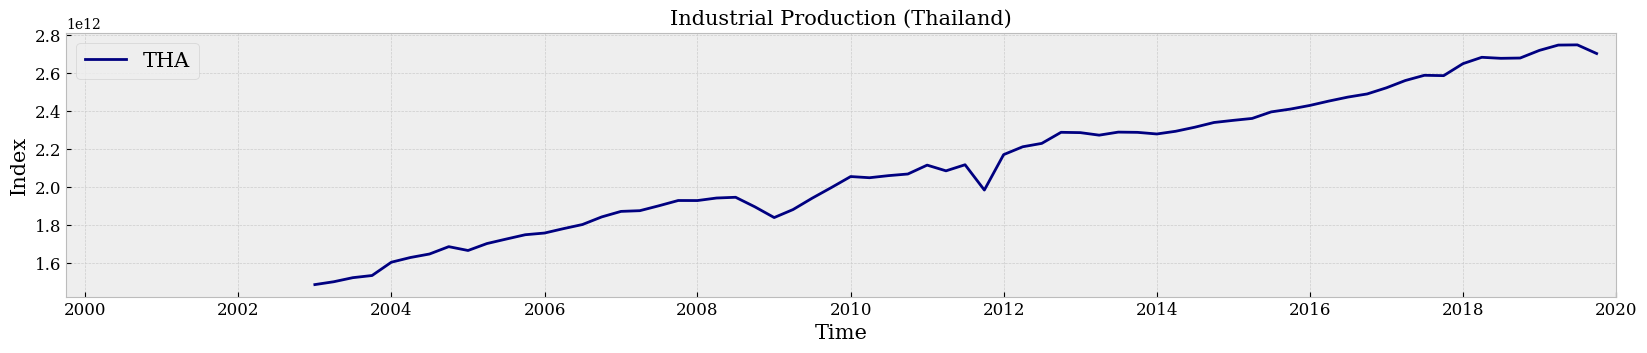

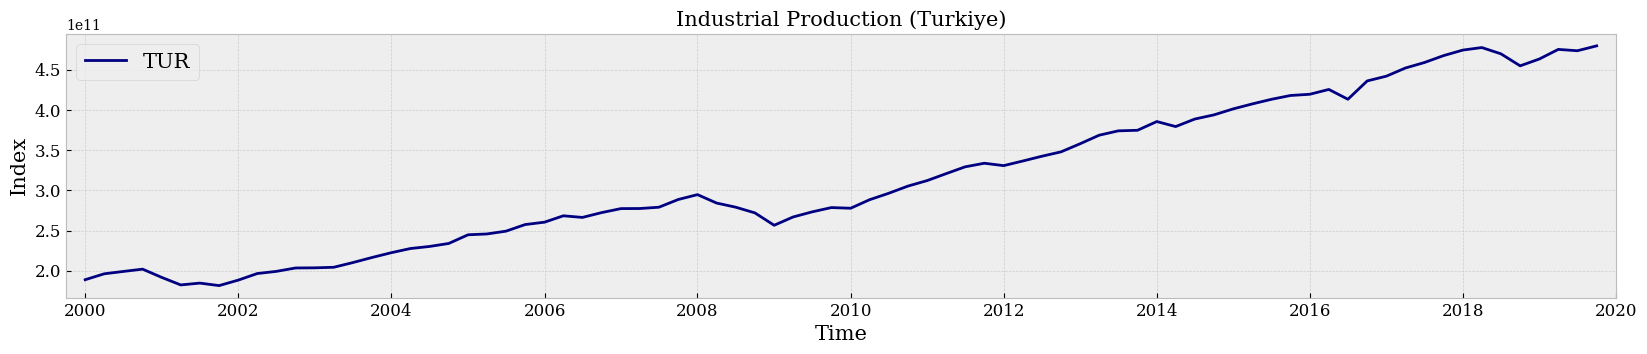

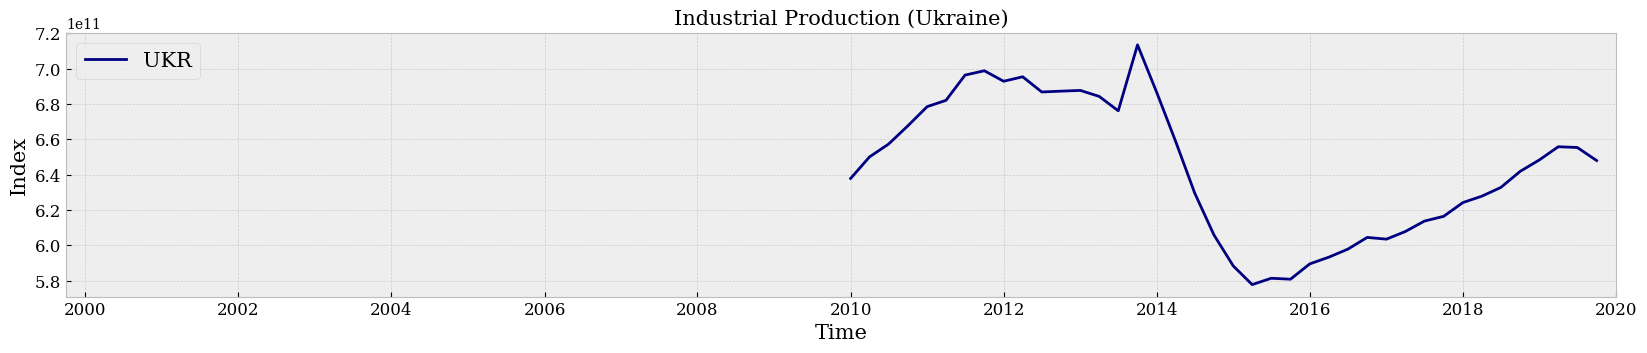

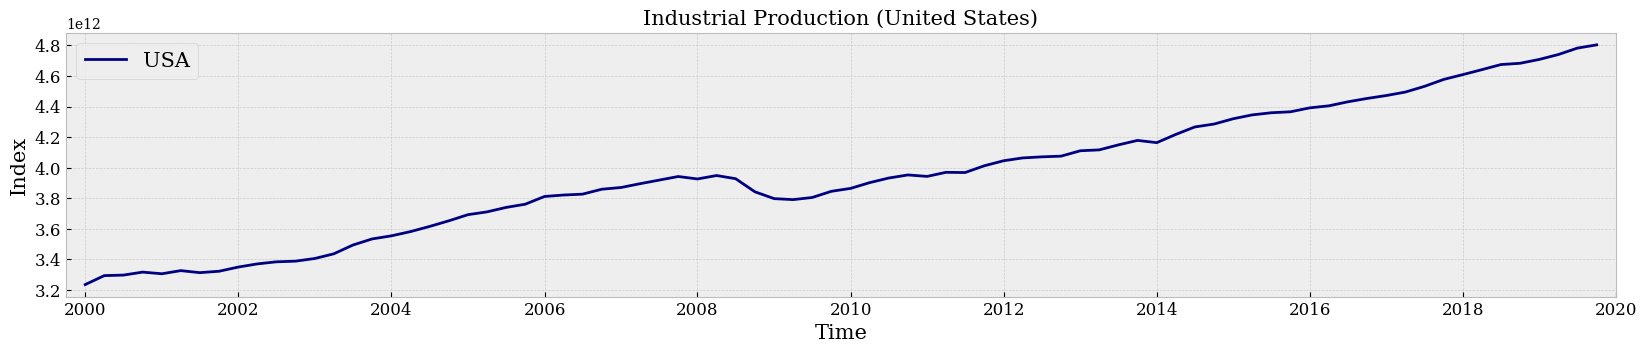

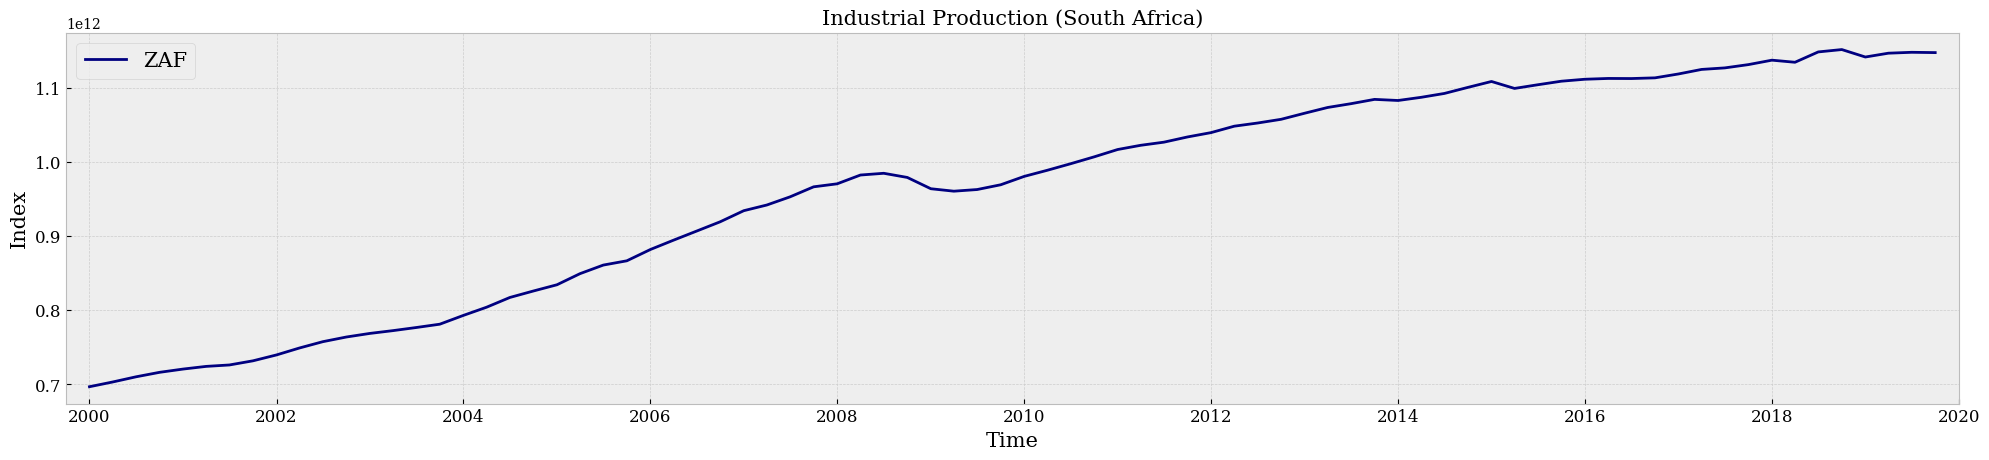

In [30]:
# check the seasonality of ip

warnings.filterwarnings(action='ignore')

for i in tqdm(range(40, 61)):

    plt.figure(figsize=(20, 250)).set_facecolor('white')

    plt.style.use('bmh')
    plt.style.context('seaborn-paper')

    sns.set_style({'grid.color': '.8',
                  'font.family':'serif',
                  'font.serif':['Times New Roman']})

    plt.subplot(data['isocode'].unique().shape[0], 1, i+1)
    plt.title('Industrial Production ({})'.format(data['country'].unique()[i]), fontsize=15)

    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]
    globals()['data_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_isocode{}'.format(i+1)]['quarter'], globals()['data_isocode{}'.format(i+1)]['gdp'], label=globals()['data_isocode{}'.format(i+1)]['isocode'].unique()[0], color='navy')

    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Index', fontsize=15)
    plt.xlim([dt.date(1999, 10, 1), dt.date(2020, 1, 1)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', ncol=1, fontsize=15)

plt.tight_layout()
# plt.grid()

# **2. export the df_imf_q_gdp**

In [26]:
# export the df_imf_q_gdp

data.to_excel(excel_writer='df_imf_q_gdp_230808.xlsx')

# **3. references**

[1] [IMF](https://data.imf.org/?sk=4c514d48-b6ba-49ed-8ab9-52b0c1a0179b)